In [14]:
# Establish Metadata
metadata = {
    'Author      ': 'Jay Annadurai',
    'Date        ': '15 Feb 2024',
    'Project     ': 'A3-DataAnalyzer',
    'Version     ': 1.0,
    'Description ': 'Performs Exploratory Data Analysis of Differential Gene Expression'
}

In [15]:
# Import Libraries
import pandas as pd  # Data Reading
import openpyxl # Read Data from XL for Pandas
import seaborn as sns  # Advanced Data Visualization
import numpy as np # Computation
import scipy as sp # Sci Py for Cluster Maps in Seaborn
import matplotlib.pyplot as plt  # Data Visualization
import matplotlib.ticker as ticker # Plugin for Matplotlib

# Allows for Interactive Python Plots:
# %matplotlib notebook 
# Allows for Static Python Plots:
%matplotlib inline 

# Data Analysis Task

## 1. Data Merging and Preparation
During data analysis it is often necessary to take information from multiple files in order to perform data analysis or make sense of your data analysis.

a. Load the data in “Gene_Expression_Data.xlsx”, “Gene_Information.csv”, and “Sample_Information.tsv” into Python.

In [16]:
files = [
    "Gene_Expression_Data.xlsx",
    "Gene_Information.csv",
    "Sample_Information.tsv"
]

input_folder_path = "Data/"

def file_to_df(file_path:str, return_dict=True) -> dict:
    # Get the File Extension by splitting on '.'
    file_path_list = file_path.rsplit(".",1)
    # Will have the path pre-extension and the extension as a list
    
    # Get the File Name by splitting on the last '/' with the part that doesn't have the ext
    file_name = file_path_list[0].rsplit("/",1)[1]
    
    # Save the Information
    file_dict = {'name': file_name, 'extension': file_path_list[1]}
    
    # Parse the File based on its extension
    if file_dict['extension'] == 'xlsx':
        df = pd.read_excel(file_path)
    elif file_dict['extension'] == 'tsv':
        df = pd.read_csv(file_path, sep='\t')
    elif file_dict['extension'] == 'csv':
        df = pd.read_csv(file_path, sep=',')
    else:
        raise TypeError("Unsupported file extension")
    
    # If the return_dict flag is enabled, return a dictionary including the name of the file
    if return_dict: return {"name": file_dict['name'],"ext": file_dict['extension'],"path": file_path, "df": df}
    
    # Return the Dataframe
    else: return df
        

In [17]:
# Initialize a Dict of Dataframes
dfs = {}

# Iterate through each file and import the Dataframes
for file in files:
    # Get the Dataframe as a Dict
    dict_df = file_to_df(input_folder_path + file)

    # Debug: Print the Dict with the DF
    # print(dict_df)
    
    # Binds the Dataframe under the file name under the Dataframes Dictionary
    dfs[dict_df['name']] = dict_df['df'] 

In [18]:
# View the Dataframe
dfs['Gene_Expression_Data']

,Probe_ID,GSM820516,GSM820517,GSM820518,GSM820519,GSM820520,GSM820521,GSM820522,GSM820523,GSM820524,GSM820525,GSM820526,GSM820527,GSM820528,GSM820529,GSM820530,GSM820531,GSM820532,GSM820533
0,ILMN_1343291,66665.3800,69404.6700,64128.0700,68943.9700,67827.2200,71775.3000,62245.5900,69713.7000,69509.2700,68244.5900,65427.4700,68436.5200,57608.6700,69959.7700,69509.2700,70063.7700,69647.1700,70332.3400
1,ILMN_1343295,22040.1100,13046.3400,38678.9600,16641.8900,33719.8900,18933.2900,26170.0400,9906.9130,17166.5200,12428.9500,25297.5700,17535.6000,19749.1400,17854.2900,43670.6800,22849.0800,23725.6600,28747.0100
2,ILMN_1651199,226.6081,205.4483,217.2475,229.0451,226.3029,203.8710,213.4431,210.4129,229.5394,212.7384,226.1345,232.2437,208.7316,229.2948,214.4033,216.6758,195.6539,252.1502
3,ILMN_1651209,278.5710,253.7044,211.8002,278.0423,259.8059,265.1900,321.2587,273.4458,253.6032,310.1582,275.0126,274.9519,250.6420,255.8540,219.5752,292.4965,253.3126,237.9844
4,ILMN_1651210,195.4914,195.9835,175.3356,193.9065,229.5674,164.0632,244.6696,190.9813,188.1039,199.3084,220.6229,213.3975,194.7746,173.7073,185.3380,174.6898,195.3534,191.9382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48798,ILMN_2415911,965.4537,1084.3610,975.9432,692.3060,1306.9460,947.1885,837.6633,587.1460,833.9681,852.5927,1234.8830,716.9376,1254.8400,835.5988,1034.8450,731.5306,1104.9090,686.2645
48799,ILMN_2415926,3583.4440,1152.4940,2049.1500,913.1962,1996.2160,1336.6350,1693.9640,902.1262,2569.1790,1317.9910,3384.6820,1741.8400,1978.3250,1048.7180,2644.4420,1294.8670,1705.6710,2486.7550
48800,ILMN_2415949,2282.5570,822.8831,2359.0100,1630.6520,2951.5930,2222.9580,2120.2090,1810.6850,1535.9080,977.6974,1849.7140,1922.0240,2400.9900,1626.1940,2502.9950,1918.5350,1135.9280,2230.4140
48801,ILMN_2415979,2389.5440,3323.9100,2554.8810,9655.9170,4155.8250,5872.2260,3631.8960,6146.9280,2984.1830,4123.6540,5451.1860,7398.6830,2048.6720,3455.2030,2476.3410,4164.1320,2756.0150,4462.6400


In [19]:
# View the Dataframe
dfs['Gene_Information']

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband
0,ILMN_1343291,EEF1A1,1915.0,6,6q13c
1,ILMN_1343295,GAPDH,2597.0,12,12p13.31d
2,ILMN_1651199,LOC643334,643334.0,NaN,2q37.3b
3,ILMN_1651209,SLC35E2,9906.0,1,1p36.33a
4,ILMN_1651210,DUSP22,56940.0,NaN,6p25.3b
...,...,...,...,...,...
48798,ILMN_2415911,ENOX2,10495.0,X,Xq25h-q26.1a
48799,ILMN_2415926,THOC3,84321.0,5,5q35.2c
48800,ILMN_2415949,MRRF,92399.0,9,9q33.2b
48801,ILMN_2415979,KIAA1751,85452.0,1,1p36.33a


In [20]:
# View the Dataframes
dfs['Sample_Information']

,group,patient
GSM820516,tumor,patient: 1
GSM820517,normal,patient: 1
GSM820518,tumor,patient: 2
GSM820519,normal,patient: 2
GSM820520,tumor,patient: 3
GSM820521,normal,patient: 3
GSM820522,tumor,patient: 4
GSM820523,normal,patient: 4
GSM820524,tumor,patient: 5
GSM820525,normal,patient: 5


b. Change the sample names from the “Gene_Expression_Data.xlsx”, based upon the phenotype presented in “Sample_Information.tsv”.



In [ ]:
# Convert the Gene_Expression_Data df from Wide Form to Long Form
gene_exp_df = dfs['Gene_Expression_Data'].melt(
    # Name of the Rows
    id_vars='Probe_ID',
    # Grab all the Columns After the Probe ID to Melt into a 'Column of Columns'
    value_vars= dfs['Gene_Expression_Data'].iloc[:, 1:],
    # Name of the Column of Columns
    var_name='Sample_Name',
    # Name of Values
    value_name='Gene_Expression'
)

# print(gene_exp_df.head(11))

In [22]:
# Validate the New DF
gene_exp_df

,Probe_ID,Sample_Name,Gene_Expression
0,ILMN_1343291,GSM820516,66665.3800
1,ILMN_1343295,GSM820516,22040.1100
2,ILMN_1651199,GSM820516,226.6081
3,ILMN_1651209,GSM820516,278.5710
4,ILMN_1651210,GSM820516,195.4914
...,...,...,...
878449,ILMN_2415911,GSM820533,686.2645
878450,ILMN_2415926,GSM820533,2486.7550
878451,ILMN_2415949,GSM820533,2230.4140
878452,ILMN_2415979,GSM820533,4462.6400


In [45]:
# Prepare the Sample_Information df by Resetting the Index
sample_info_df = dfs['Sample_Information'].reset_index(drop=False)

# The index column is now non-indexed and under the column name 'index', it must be renamed
sample_info_df = sample_info_df.rename(columns={'index': 'Sample_Name', 'group': 'Group', 'patient': 'Patient'})

# Standardize the Patient Column into Only the Patient Number
# In a Pandas DF, string operations are performed directly on the series with 'str.method'
# The second element within that string within the series is selected with str.get(1)
sample_info_df['Patient_Number'] = sample_info_df['Patient'].str.rsplit(':',n=1).str.get(1).astype(int)

# Now drop the original Patients Column
sample_info_df = sample_info_df.drop(columns=['Patient'],inplace=False)

# print(sample_info_df.head(11))

In [46]:
# Validate the DF
sample_info_df

,Sample_Name,Group,Patient_Number
0,GSM820516,tumor,1
1,GSM820517,normal,1
2,GSM820518,tumor,2
3,GSM820519,normal,2
4,GSM820520,tumor,3
5,GSM820521,normal,3
6,GSM820522,tumor,4
7,GSM820523,normal,4
8,GSM820524,tumor,5
9,GSM820525,normal,5


In [47]:
# Merge the Dataframes on Sample Name
# Do an Inner Join just in case
gene_exp_df = pd.merge(gene_exp_df, sample_info_df, how='inner',on='Sample_Name')

#print(gene_exp_df.head(11))

In [48]:
gene_exp_df

,Probe_ID,Sample_Name,Gene_Expression,Group,Patient_Number
0,ILMN_1343291,GSM820516,66665.3800,tumor,1
1,ILMN_1343295,GSM820516,22040.1100,tumor,1
2,ILMN_1651199,GSM820516,226.6081,tumor,1
3,ILMN_1651209,GSM820516,278.5710,tumor,1
4,ILMN_1651210,GSM820516,195.4914,tumor,1
...,...,...,...,...,...
878449,ILMN_2415911,GSM820533,686.2645,normal,9
878450,ILMN_2415926,GSM820533,2486.7550,normal,9
878451,ILMN_2415949,GSM820533,2230.4140,normal,9
878452,ILMN_2415979,GSM820533,4462.6400,normal,9


c. Split the merged data from part c, into 2 parts, based upon their labeled phenotype (i.e. tumor or normal)

In [52]:
# Define Phenotypes to Split the Dataframes 
phenotypes = ['Tumor','Normal']
phenotype_dfs = {}

# Split the Dataframes into Several Dataframes based on the Group Phenotype
for phenotype in phenotypes:
    phenotype_dfs[phenotype] = gene_exp_df[gene_exp_df['Group'] == phenotype.lower()].reset_index(drop=True)
    print(f"Group '{phenotype}' {phenotype_dfs[phenotype].shape}: \n {phenotype_dfs[phenotype].head(5)} \n\n")

Group 'Tumor' (439227, 5): 
        Probe_ID Sample_Name  Gene_Expression  Group  Patient_Number
0  ILMN_1343291   GSM820516       66665.3800  tumor               1
1  ILMN_1343295   GSM820516       22040.1100  tumor               1
2  ILMN_1651199   GSM820516         226.6081  tumor               1
3  ILMN_1651209   GSM820516         278.5710  tumor               1
4  ILMN_1651210   GSM820516         195.4914  tumor               1 


Group 'Normal' (439227, 5): 
        Probe_ID Sample_Name  Gene_Expression   Group  Patient_Number
0  ILMN_1343291   GSM820517       69404.6700  normal               1
1  ILMN_1343295   GSM820517       13046.3400  normal               1
2  ILMN_1651199   GSM820517         205.4483  normal               1
3  ILMN_1651209   GSM820517         253.7044  normal               1
4  ILMN_1651210   GSM820517         195.9835  normal               1 


d. Compute the average expression for all genes from the 2 data sets from part c

In [53]:
# Initialize a dict to hold the Average Gene Expression DFs
avg_exp_phenotype_dfs = {}

# Iterate through the Phenotype DFs
for phenotype in phenotype_dfs:
    # Group the Elements by the Probe_ID, get the Gene_Expression Column, and then apply the mean calculation across groups
    avg_exp_df = phenotype_dfs[phenotype].groupby('Probe_ID')['Gene_Expression'].mean().reset_index()
    
    # Rename the Column of the Average Expression to Reflect that it's the Average Expression
    avg_exp_df.rename(columns={'Gene_Expression': 'Gene_Exp_Avg'},inplace=True)

    # Attach the DF to the Dictionary of DFs
    avg_exp_phenotype_dfs[phenotype] = avg_exp_df
    
    print(f"Phenotype: {phenotype} {avg_exp_df.shape}\n{avg_exp_df.head(5)}\n\n")



Phenotype: Tumor (48803, 2)
       Probe_ID  Gene_Exp_Avg
0  ILMN_1343291  65840.901111
1  ILMN_1343295  27802.063333
2  ILMN_1651199    217.562700
3  ILMN_1651209    258.175711
4  ILMN_1651210    203.250756


Phenotype: Normal (48803, 2)
       Probe_ID  Gene_Exp_Avg
0  ILMN_1343291  69652.736667
1  ILMN_1343295  17549.262556
2  ILMN_1651199    221.320022
3  ILMN_1651209    271.314167
4  ILMN_1651210    188.663967


e. Determine the fold change for each Probe between the two groups ((Tumour – Control) / Control)

In [ ]:
# Merge the Two Dataframes into One for the sake of Quantitative Comparison
phenotype_comparison_df = pd.merge(
    # The DFs to Merge
    avg_exp_phenotype_dfs['Tumor'],
    avg_exp_phenotype_dfs['Normal'],
    # Inner Join to only compare Probes that have values in both
    how='inner',
    # Merge on the Probe ID column
    on='Probe_ID',
    # Rename the Column with Prefixes
    # Note, this requires a Tuple and not a List
    suffixes = ('_Tumor', '_Normal')
)

# Print the DF Head to Validate Operations
# print(phenotype_comparison_df.head())

In [54]:
phenotype_comparison_df

,Probe_ID,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1343291,65840.901111,69652.736667,-0.054726,-0.081196
1,ILMN_1343295,27802.063333,17549.262556,0.584230,0.663782
2,ILMN_1651199,217.562700,221.320022,-0.016977,-0.024703
3,ILMN_1651209,258.175711,271.314167,-0.048425,-0.071611
4,ILMN_1651210,203.250756,188.663967,0.077316,0.107442
...,...,...,...,...,...
48798,ILMN_2415911,1061.050144,792.658411,0.338597,0.420722
48799,ILMN_2415926,2400.563667,1354.958044,0.771689,0.825125
48800,ILMN_2415949,2126.544889,1684.671389,0.262291,0.336044
48801,ILMN_2415979,3160.949222,5400.365889,-0.414679,-0.772699


In [28]:
# Add a Column with the Fold Change Computation ( (Condition - Control) / (Control) )
condition = phenotype_comparison_df['Gene_Exp_Avg_Tumor']
control =  phenotype_comparison_df['Gene_Exp_Avg_Normal']

# Note, the provided Fold Change Computation cannot describe symmetry well
phenotype_comparison_df['Fold_Change'] = (condition - control) / control
phenotype_comparison_df['log_Fold_Change'] = np.log2( condition  / control )

# Print the DF to Validate Operations
phenotype_comparison_df

,Probe_ID,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1343291,65840.901111,69652.736667,-0.054726,-0.081196
1,ILMN_1343295,27802.063333,17549.262556,0.584230,0.663782
2,ILMN_1651199,217.562700,221.320022,-0.016977,-0.024703
3,ILMN_1651209,258.175711,271.314167,-0.048425,-0.071611
4,ILMN_1651210,203.250756,188.663967,0.077316,0.107442
...,...,...,...,...,...
48798,ILMN_2415911,1061.050144,792.658411,0.338597,0.420722
48799,ILMN_2415926,2400.563667,1354.958044,0.771689,0.825125
48800,ILMN_2415949,2126.544889,1684.671389,0.262291,0.336044
48801,ILMN_2415979,3160.949222,5400.365889,-0.414679,-0.772699


f. Use the data from part e and “Gene_Information.csv” to identify all genes fold change magnitude (absolute value) was greater than 5

In [29]:
# Filter the Phenotype Comparison DF for an absolute fold change greater than 5
significant_genes_df = phenotype_comparison_df[abs(phenotype_comparison_df['log_Fold_Change']) > 5]

# Print the DF to Validate Operations
significant_genes_df

,Probe_ID,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
310,ILMN_1652431,544.877033,31266.639556,-0.982573,-5.842550
6537,ILMN_1681462,9065.138122,203.389556,43.570323,5.478012
12453,ILMN_1713462,329.270233,19227.673778,-0.982875,-5.867768
20560,ILMN_1763749,785.278878,25938.407000,-0.969725,-5.045741
26614,ILMN_1802441,9412.236744,212.872711,43.215328,5.466475
44270,ILMN_2192072,9960.201889,258.986000,37.458457,5.265229
47796,ILMN_2382679,8341.601200,219.782644,36.953867,5.246175


In [100]:
# Merge the Gene Information from the Gene_Information df onto the Significant Genes DF
annotated_significant_genes_df = pd.merge(
    # The DFs to Merge
    dfs["Gene_Information"], # Contains the Gene annotations
    significant_genes_df, # Contains the Up-Regulated and Down-Regulated Genes with | Log Fold Change | > 5
    # Right Join to grab all available information from the left df but keep all the genes of the right df
    how='right',
    # Merge on the Probe ID column
    on='Probe_ID',
)

# Print the DF to validate operations
annotated_significant_genes_df

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1652431,CA1,759.0,8,8q21.2b,544.877033,31266.639556,-0.982573,-5.842550
1,ILMN_1681462,REG1B,5968.0,2,2p12e,9065.138122,203.389556,43.570323,5.478012
2,ILMN_1713462,AQP8,343.0,16,16p12.1b,329.270233,19227.673778,-0.982875,-5.867768
3,ILMN_1763749,GUCA2A,2980.0,1,1p34.2b,785.278878,25938.407000,-0.969725,-5.045741
4,ILMN_1802441,REG1A,5967.0,2,2p12e,9412.236744,212.872711,43.215328,5.466475
5,ILMN_2192072,MMP7,4316.0,11,11q22.2a,9960.201889,258.986000,37.458457,5.265229
6,ILMN_2382679,REG3A,5068.0,2,2p12e,8341.601200,219.782644,36.953867,5.246175


g. Add a column to the result of part f to include if the gene was higher expressed in “Normal” or “Tumor” samples

In [101]:
# print(annotated_significant_genes_df.head(11))
annotated_significant_genes_df

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1652431,CA1,759.0,8,8q21.2b,544.877033,31266.639556,-0.982573,-5.842550
1,ILMN_1681462,REG1B,5968.0,2,2p12e,9065.138122,203.389556,43.570323,5.478012
2,ILMN_1713462,AQP8,343.0,16,16p12.1b,329.270233,19227.673778,-0.982875,-5.867768
3,ILMN_1763749,GUCA2A,2980.0,1,1p34.2b,785.278878,25938.407000,-0.969725,-5.045741
4,ILMN_1802441,REG1A,5967.0,2,2p12e,9412.236744,212.872711,43.215328,5.466475
5,ILMN_2192072,MMP7,4316.0,11,11q22.2a,9960.201889,258.986000,37.458457,5.265229
6,ILMN_2382679,REG3A,5068.0,2,2p12e,8341.601200,219.782644,36.953867,5.246175


In [102]:
# Dynamic Way of Handling Multiple Phenotypes, Unused
def highest_expression_per_phenotype(
        phenotype_labels: list, 
        phenotype_expressions_df: pd.DataFrame, 
        label_prefix='_',
        gene_expression_column_prefix='Gene_Exp_Avg'
):
    # Column Name === f'{ gene_expression_column_prefix + label_prefix + phenotype_label }'
    # Assemble the common string in all the phenotype expression columns
    common_column_str = gene_expression_column_prefix + label_prefix
    
    # Identify the Column Names for the Gene Expressions for the Corresponding Phenotypes
    expression_columns = []
    for label in phenotype_labels:
        expression_columns.append(f'{common_column_str+label}')
    
    # Find the maximum expression across the specified phenotypes for each gene
    max_expression_col = phenotype_comparison_df[expression_columns].idxmax(axis="columns")
    
    # Get the Maximum Phenotype name from the name of the column with the maximum expression
    # Erase the common_column_str by replacing it with an empty string
    max_phenotype = max_expression_col.str.replace(f'{common_column_str}', '')

    # Build the Column containing the string name of the Phenotype with the maximum gene expression
    phenotype_expressions_df['Highest_Exp_Phenotype'] = max_phenotype
    
    # Return the Updated Dataframe
    return phenotype_expressions_df

In [103]:
# Simplified Function with np.where(condition, [returnThisIfTrue,returnThisIfFalse])
def higher_expression_phenotype(
        condition_phenotype: str, 
        normal_phenotype: str, 
        phenotype_expressions_df: pd.DataFrame,
        label_prefix='_',
        gene_expression_column_prefix='Gene_Exp_Avg'
) -> np.ndarray: 
    # Create a List of the Phenotypes to Iterate Through
    pts_list = [condition_phenotype, normal_phenotype]
    
    # Build a Dict of the Phenotype Information using the List
    pts = {}
    for pt in pts_list:
        pts[pt] = {
            # Name of the Phenotype
            "label": pt,
            # Corresponding DF Column === f'{ gene_expression_column_prefix + label_prefix + phenotype_label }'
            "col": phenotype_expressions_df[f'{gene_expression_column_prefix + label_prefix +pt}']
        }
    
    # Boolean Test for the np.Where Function
    test_condition = pts[condition_phenotype]["col"] > pts[normal_phenotype]["col"]
    # Logical Returns based on the Boolean Test
    returns = {True: pts[condition_phenotype]["label"], False: pts[normal_phenotype]["label"]}
    
    # Use np.where to vectorize the entire columns for column math
    return np.where(test_condition,returns[True], returns[False])

In [104]:
# Use np.where(condition, returnThisIfTrue, returnThisIfFalse]) for simplicity
annotated_significant_genes_df['Higher_Exp_Phenotype'] = higher_expression_phenotype('Tumor','Normal',annotated_significant_genes_df,'_','Gene_Exp_Avg')
# Use highest_expression_per_phenotype (...) to handle phenotypes dynamically with '.idxmax' method
# Use higher_expression_phenotype (...) to handle two phenotypes only with np.where

# Print the DataFrame to validate operations
#print(annotated_significant_genes_df.head(annotated_significant_genes_df.__sizeof__()))
annotated_significant_genes_df

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change,Higher_Exp_Phenotype
0,ILMN_1652431,CA1,759.0,8,8q21.2b,544.877033,31266.639556,-0.982573,-5.842550,Normal
1,ILMN_1681462,REG1B,5968.0,2,2p12e,9065.138122,203.389556,43.570323,5.478012,Tumor
2,ILMN_1713462,AQP8,343.0,16,16p12.1b,329.270233,19227.673778,-0.982875,-5.867768,Normal
3,ILMN_1763749,GUCA2A,2980.0,1,1p34.2b,785.278878,25938.407000,-0.969725,-5.045741,Normal
4,ILMN_1802441,REG1A,5967.0,2,2p12e,9412.236744,212.872711,43.215328,5.466475,Tumor
5,ILMN_2192072,MMP7,4316.0,11,11q22.2a,9960.201889,258.986000,37.458457,5.265229,Tumor
6,ILMN_2382679,REG3A,5068.0,2,2p12e,8341.601200,219.782644,36.953867,5.246175,Tumor


## 2. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical initial step in the data analysis process. It involves systematically examining and visualizing data sets to gain insights, detect patterns, and identify anomalies. EDA helps data analysts and scientists understand the structure and characteristics of their data, making it easier to formulate hypotheses and guide subsequent analysis.

a. Perform exploratory data analysis on the genes from part 1g

In [108]:
# Create a primary dataframe for plotting
# Columns for the Primary Dataframe
plot_columns = ['Probe_ID','Symbol','Chromosome', 'Cytoband', 'Gene_Exp_Avg_Tumor', 'Gene_Exp_Avg_Normal','log_Fold_Change','Higher_Exp_Phenotype']


# Build the Initial Plot DF by Copying from the Annotated Significant Genes DF
plot_df = annotated_significant_genes_df[plot_columns].copy()

# Rename Columns for Human Interpretation
plot_df.rename(columns={'Probe_ID':'Probe', 'Symbol': 'Gene','log_Fold_Change':'logFC','Higher_Exp_Phenotype': 'Class'},inplace=True)

# Columns to Transform by taking the Log2 Value of to Normalize
data_to_log_column_names = ['Gene_Exp_Avg_Tumor','Gene_Exp_Avg_Normal']
# Initialize an empty array to contain transformed names
log_columns = [] 

for data_to_log_column in data_to_log_column_names:
    # Generate the Log Column Data
    log_column_data = np.log2(plot_df[data_to_log_column])
    # Drop the Old Column
    plot_df.drop(columns=[data_to_log_column],inplace=True)
    
    # Prepare the Column Name for the Plot by erasing the Gene_Exp_Avg
    log_column = data_to_log_column.replace("Gene_Exp_Avg_","")
    # Append the Name to the Array of Column Names
    log_columns.append(log_column)
    # Write the New Column
    plot_df[log_column] = log_column_data


# Validate the DF by Printing it
print(plot_df.head())

          Probe    Gene Chromosome  Cytoband     logFC   Class      Tumor  \
0  ILMN_1652431     CA1          8   8q21.2b -5.842550  Normal   9.089787   
1  ILMN_1681462   REG1B          2     2p12e  5.478012   Tumor  13.146113   
2  ILMN_1713462    AQP8         16  16p12.1b -5.867768  Normal   8.363128   
3  ILMN_1763749  GUCA2A          1   1p34.2b -5.045741  Normal   9.617061   
4  ILMN_1802441   REG1A          2     2p12e  5.466475   Tumor  13.200322   

      Normal  
0  14.932337  
1   7.668102  
2  14.230897  
3  14.662802  
4   7.733847  


In [109]:
# Reshape the DataFrame to long format via melt to have one Value per row
eda_plot_df = pd.melt(
    # DF to Melt
    plot_df, 
    # Names of Variables to Keep As-Is
    id_vars=["Gene","Probe","Chromosome","Cytoband",],
    # Variables to Melt from Wide to Long
    value_vars=["Normal","Tumor"],
    # Difference between the Value Vars
    var_name="Class",
    # New Name of the Value Vars
    value_name="Log2 ( GeneExpression )"
)

# Sort by 'Chromosome', 'Cytoband', and 'Gene' AKA in the order of heirarchy
eda_plot_df.sort_values(by=['Chromosome','Cytoband', 'Gene'], inplace=True)

# Validate the Shape of the New Plot
eda_plot_df

,Gene,Probe,Chromosome,Cytoband,Class,Log2 ( GeneExpression )
3,GUCA2A,ILMN_1763749,1,1p34.2b,Normal,14.662802
10,GUCA2A,ILMN_1763749,1,1p34.2b,Tumor,9.617061
5,MMP7,ILMN_2192072,11,11q22.2a,Normal,8.016730
12,MMP7,ILMN_2192072,11,11q22.2a,Tumor,13.281959
2,AQP8,ILMN_1713462,16,16p12.1b,Normal,14.230897
9,AQP8,ILMN_1713462,16,16p12.1b,Tumor,8.363128
4,REG1A,ILMN_1802441,2,2p12e,Normal,7.733847
11,REG1A,ILMN_1802441,2,2p12e,Tumor,13.200322
1,REG1B,ILMN_1681462,2,2p12e,Normal,7.668102
8,REG1B,ILMN_1681462,2,2p12e,Tumor,13.146113


In [110]:
# Function to Apply Jay Annadurai's Preferred Styles to A Plot
def jay_plt_ax_style_applicator(
        matplot_ax: plt.axis,
        enable_minor_ticks=True,
        enable_horizontal_gridlines=True,
        enable_vertical_gridlines=False,
        gridlines_width = 0.4,
        gridlines_alpha = 0.8,
        enable_plot_borders=True,
        enable_minor_gridlines=True,
        font_family='Trebuchet MS',
        font_size_pt=False
):
    # Remember, Matplot_ax is technically a subplot
    
    # If the font_family is over-ridden, set the Fonts
    if font_family is not False:
        # Set the Global Font of Plots
        plt.rc('font',family=font_family)
        
        # # Set font family for major tick labels
        # for label in (matplot_ax.get_xticklabels() + matplot_ax.get_yticklabels()):
        #     label.set_fontfamily(font_family)
        # 
        # # Set font family for axis label and title
        # matplot_ax.title.set_fontfamily(font_family)
        # matplot_ax.xaxis.label.set_fontfamily(font_family)
        # matplot_ax.yaxis.label.set_fontfamily(font_family)

    # If the font_size is over-ridden, set the Font Size globally
    if font_size_pt is not False:
        # Set the Global Font Size of Plots
        plt.rc('font',size=font_size_pt)
    
    # Series of Style Options
    if enable_minor_ticks:
        # Import the Matplot Lib to generate tick marks
        from matplotlib import ticker
        
        # Adding minor tick marks on the x-axis
        matplot_ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    
        # Adding minor tick marks on the y-axis
        matplot_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
        # Customize minor tick appearance
        matplot_ax.tick_params(which='minor', length=4, color='r')

    # If either grid line option is selected, set the gridlines below the axis
    if enable_horizontal_gridlines or enable_vertical_gridlines:
        # Ensure gridlines are drawn below plot elements
        matplot_ax.set_axisbelow(True)

    # If Enable Horizontal Gridlines is True, draw horizontal gridlines
    if enable_horizontal_gridlines:
        # Add horizontal gridlines
        matplot_ax.grid(which='major', axis='y', linestyle='-', linewidth=gridlines_width, color='#444', alpha=gridlines_alpha)
        # If Minor Gridlines are enabled, also draw them
        if enable_minor_gridlines: 
            matplot_ax.grid(which='minor', axis='y', linestyle='-', linewidth=gridlines_width/2, color='#222', alpha=gridlines_alpha/2)

    # If Enable Vertical Gridlines is True, draw vertical gridlines
    if enable_vertical_gridlines:
        # Add horizontal gridlines
        matplot_ax.grid(which='major', axis='x', linestyle='-', linewidth=gridlines_width, color='#444', alpha=gridlines_alpha)
        # If Minor Gridlines are enabled, also draw them
        if enable_minor_gridlines:
            matplot_ax.grid(which='minor', axis='x', linestyle='-', linewidth=gridlines_width/2, color='#222', alpha=gridlines_alpha/2)

    # If Plot Borders are enabled, draw plot borders by setting the spine accordingly
    if enable_plot_borders:
    
        # Add a border around each subplot axis, AKA the spine
        for spine in matplot_ax.spines.values():
            spine.set_visible(True)
            spine.set_edgecolor('#000')
            spine.set_linewidth(gridlines_width*1.5)
            
    # Return the Plot
    return matplot_ax

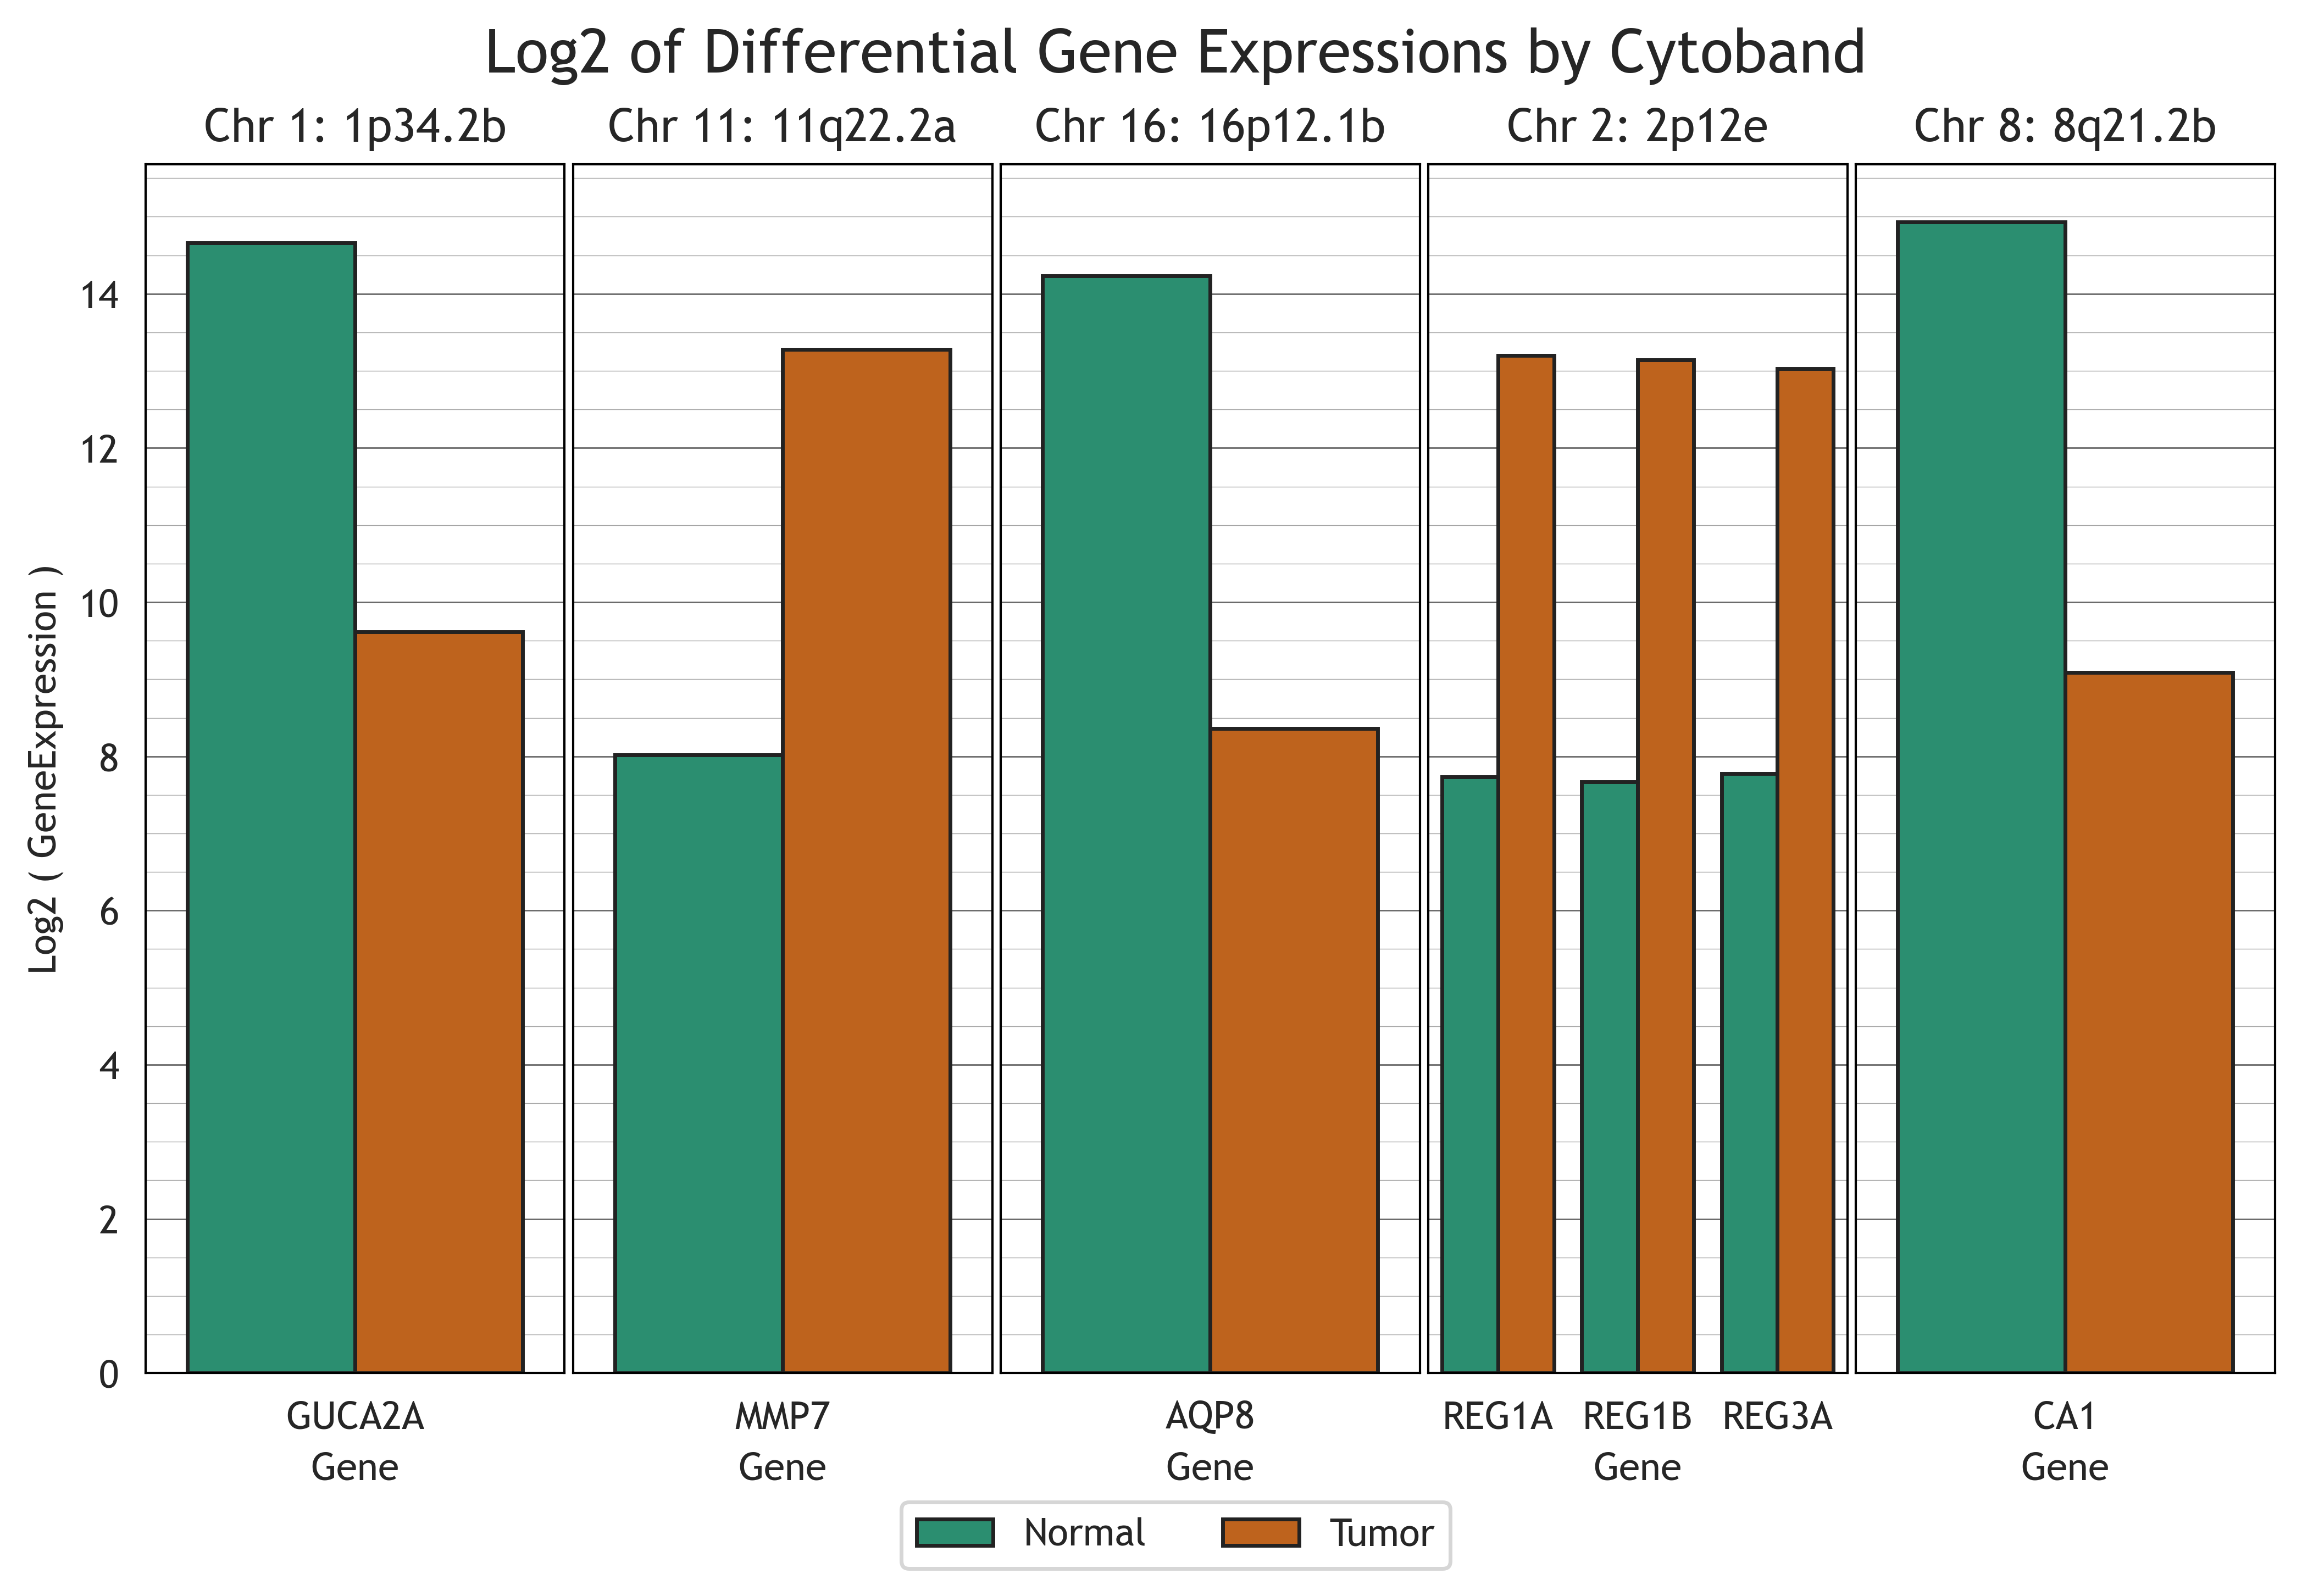

In [111]:
# Goal:
# Create a Large Plot with several sub-plots to group all the genes under one cytoband

# First get the number of distinct cytobands to calculate number of necessary subplots
distinct_cytobands = eda_plot_df['Cytoband'].unique()
quantity_subplots = len(distinct_cytobands)

# Begin Building the Figure and Map the Subplots
fig, axes = plt.subplots(
    # Number of Rows & Columns
    nrows = 1, 
    ncols= quantity_subplots, 
    # Scale the Size of the Figure according to the Subplots
    figsize=(2 * quantity_subplots, 5),
    dpi=500,
    # Make all the Subplots share the same Y axis
    sharey='all'
)

# Add a plot Title
fig.suptitle('Log2 of Differential Gene Expressions by Cytoband', fontsize=16)

# Per Unique Cytoband, Generate a Subplot
for i, cytoband in enumerate(distinct_cytobands):

    # Filter dataframe for the current cytoband
    distinct_cytoband_df = eda_plot_df[eda_plot_df['Cytoband'] == cytoband]
    
    # Get the associated chromosome for labeling purposes
    cytoband_chromosome = distinct_cytoband_df['Chromosome'].mode()[0]

    # Plot the individual cytoband subplot
    
    # Specify which of the Subplots this Subplot specifically is
    cytoband_plot = axes[i]
 
    # Generate the Actual Bar plot for the Subplot with Seaborn
    sns.barplot(
        # Select the Data for the Subplot
        data = distinct_cytoband_df, 
        # Categorical Label for the Subplot X-Axis
        x = "Gene", 
        # Categorical Label for the Shared Y-Axis
        y = "Log2 ( GeneExpression )",
        # Change Color based on the Tumor/Normal Class
        hue = "Class", 
        # Define the Specific Subplot to Generate this Bar plot On
        ax = cytoband_plot, 
        # Seaborn Color Palettes: https://www.practicalpythonfordatascience.com/ap_seaborn_palette
        palette = 'Dark2',
        # Set borders around the bars
        edgecolor = '#222'
    )

    # Remove the Y Label for all but the first sub plot
    if i != 0:
        cytoband_plot.set_ylabel('')

    # Remove the legend from each subplot to avoid duplication
    cytoband_plot.legend().set_visible(False)

    # Set the Subplot Title and Major Parameter Ticks
    cytoband_plot.set_title(f'Chr {cytoband_chromosome}: {cytoband}')
    
    # Style the Subplot
    cytoband_plot = jay_plt_ax_style_applicator(cytoband_plot,font_family='Trebuchet MS')

# End of Subplot Loop

# Prepare and place the common legend at the bottom

# Get the Handles (References to the Series) and their Labels for the Legend
handles, labels = axes[0].get_legend_handles_labels()

# Build a Common Legend for all the Subplots
fig.legend(
    # Labels of the Legend
    labels=labels,
    # Colors/Reference to the Series
    handles=handles,
    # Layout of Legend Items
    ncol=2,
    
    #Modify Location of Legend
    loc='upper center', # Needs to stay like this to prevent wierd dimensional changes
    handlelength=2,
    bbox_to_anchor=(0.5, -0.08),
)


# Adjust the subplot layout for increased space efficiency
plt.subplots_adjust(wspace=0.02,bottom=0)  # Increase bottom margin to make space for the legend

# Show the Plot
plt.show()
# Close the Plot to Prevent any Inconsistencies
plt.close()

b. Create a histogram showing the distribution of the number of differentially expressed genes (DEGs) by chromosome

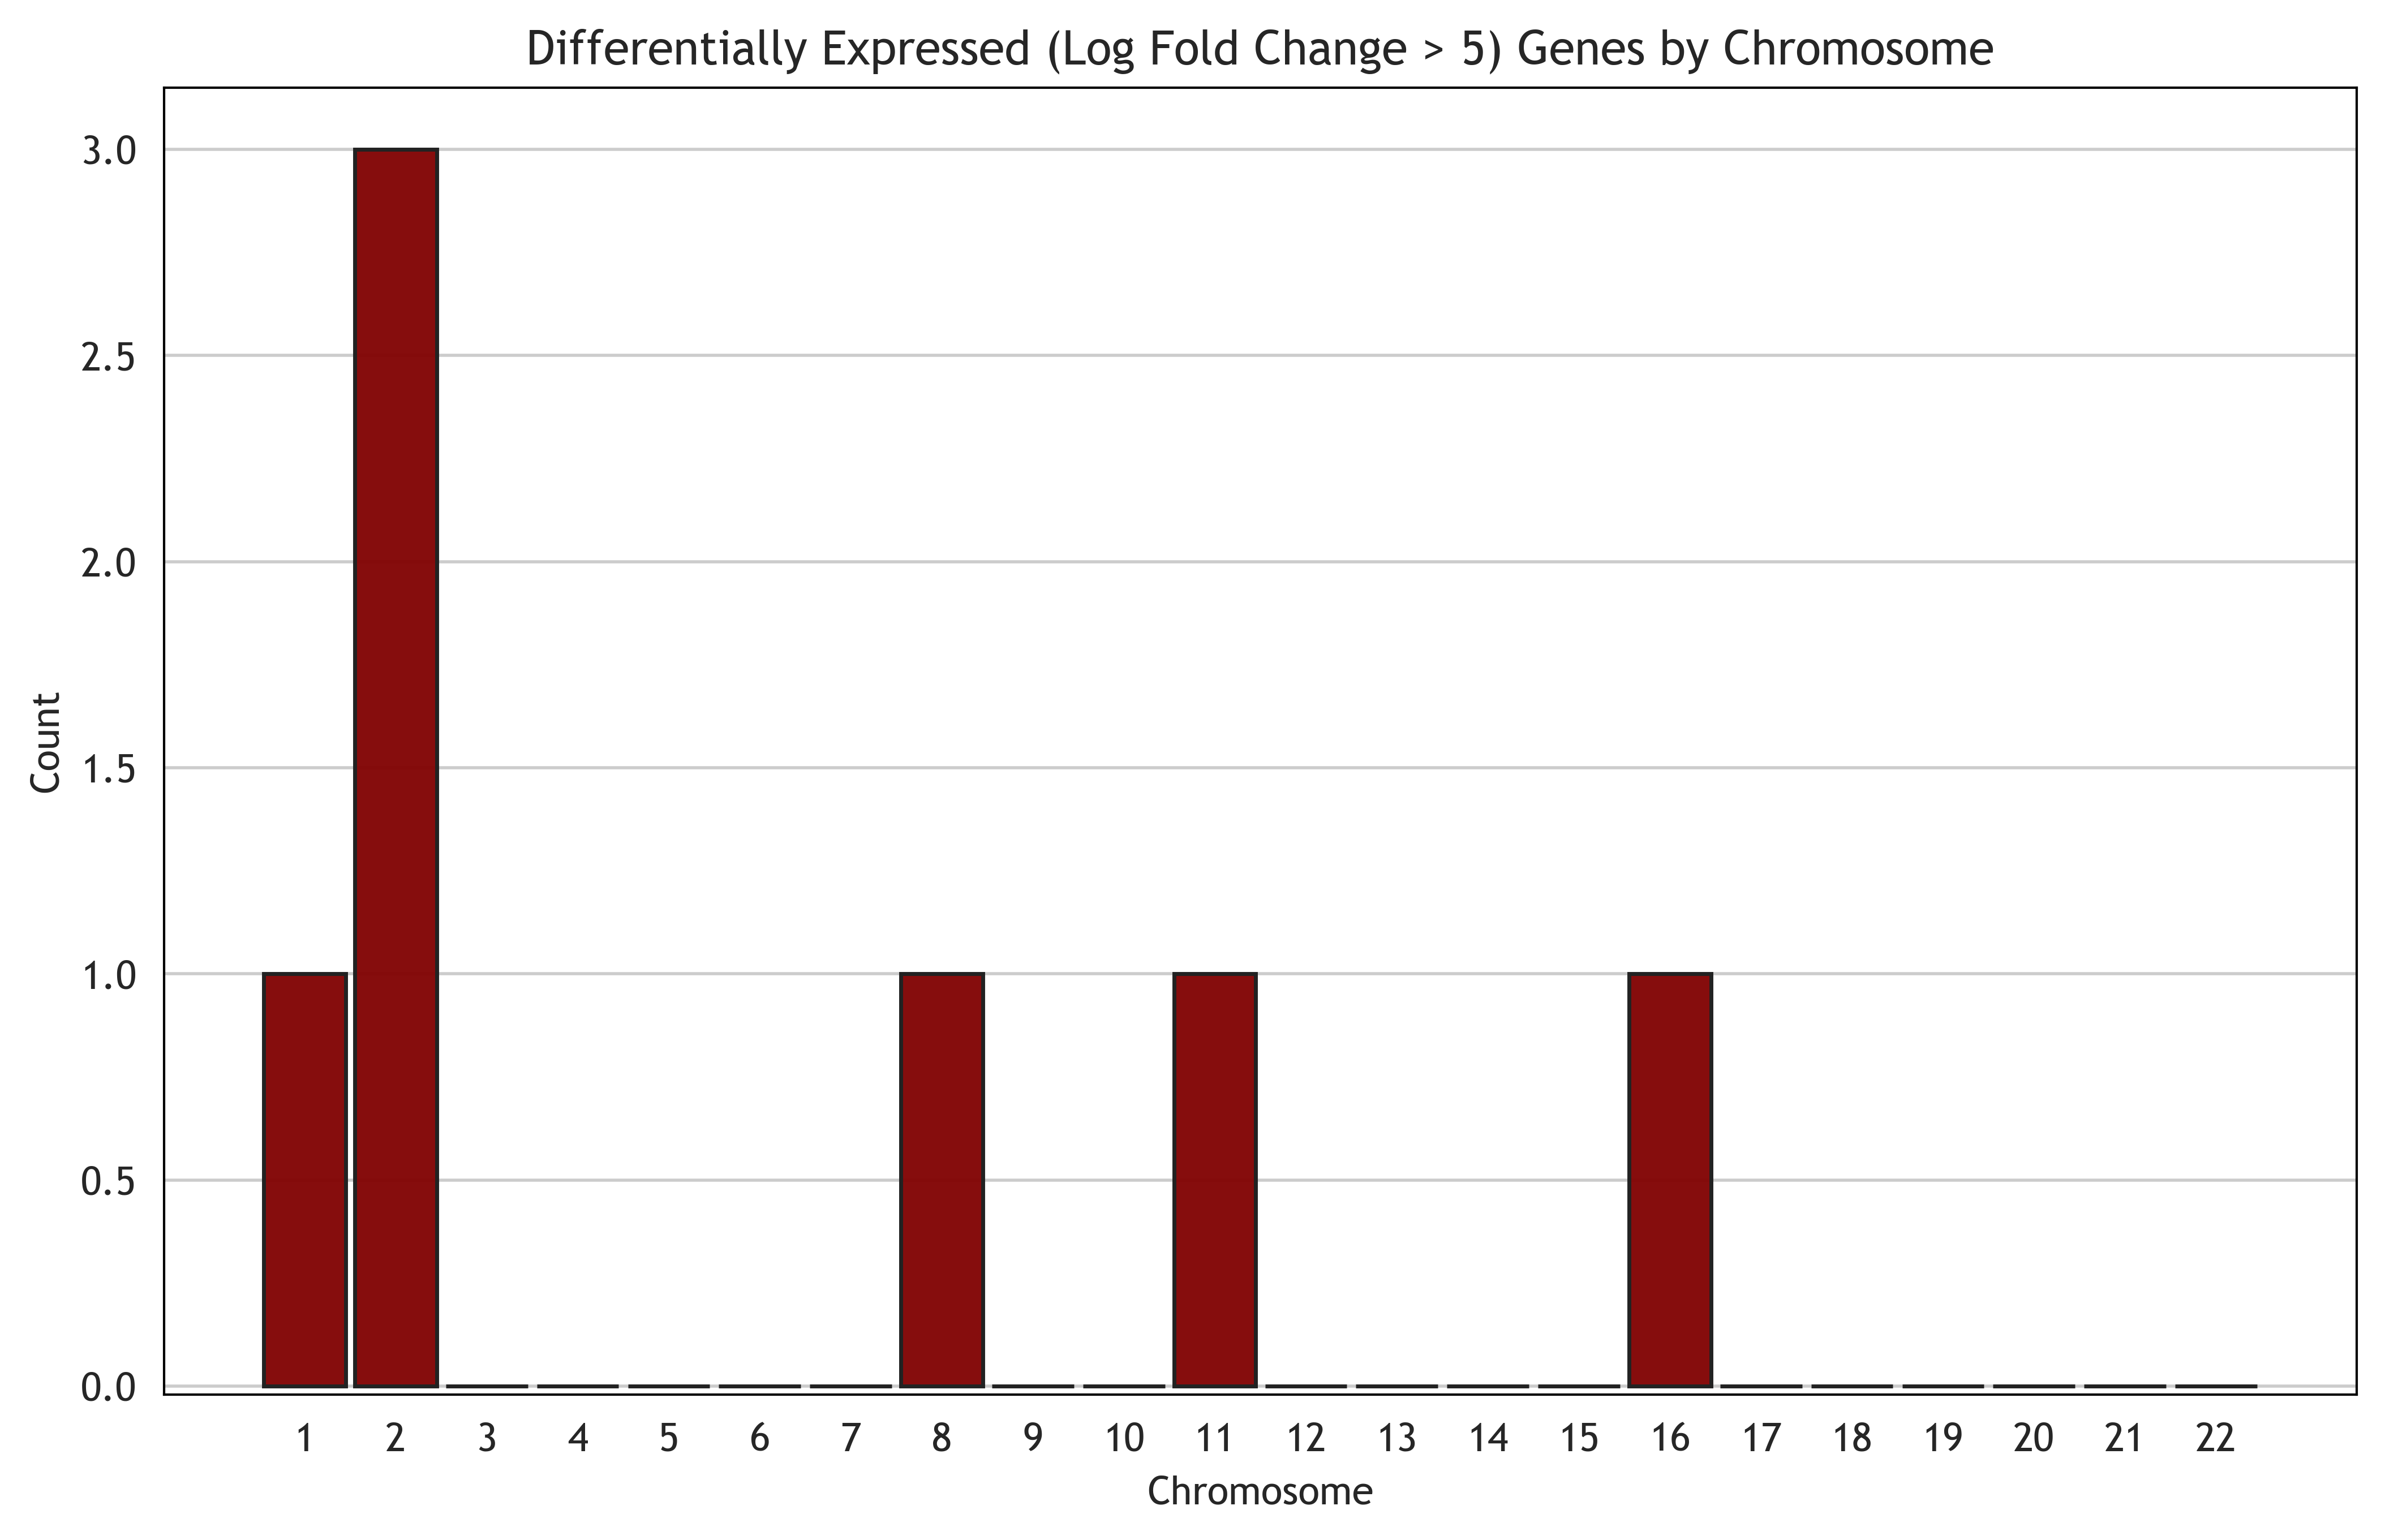

In [129]:
# Goal:
# Create a Histogram of Differentially Expressed Genes

# Sort the dataframe numerically by chromosome
hist_deg_df = plot_df.copy()
hist_deg_df['Chromosome'] = pd.to_numeric(hist_deg_df['Chromosome'])
hist_deg_df.sort_values(by='Chromosome',inplace=True)

# Total Number of Somatic Chromosomes
count_chromosomes = 22

# Open the Matplotlib figure and axes
fig, histogram_plot = plt.subplots(figsize=(10, 6), dpi=500)

# Add a plot title
histogram_plot.set_title('Differentially Expressed (Log Fold Change > 5) Genes by Chromosome')

# Use Seaborn to generate a histogram of Differentially Expressed Genes
sns.histplot(
    # Select the Data for the Subplot
    data = hist_deg_df,
    # Label for the Bins
    x = "Chromosome",
    # Each Chromosome is a Discrete Variable
    discrete=True,
    # Bin Range is the number of chromosomes
    binrange=(1,count_chromosomes),
    # Define the Specific Subplot to Generate this Hist plot On
    ax = histogram_plot,
    # Set borders around the Bars
    edgecolor = '#222',
    # Set the color of the Bars
    color='Maroon',
    # Set a gap between Bars
    shrink=0.9,
    # Set the Opacity of the Bars
    alpha=0.95
)

# Apply the universal style setting
jay_plt_ax_style_applicator(histogram_plot, font_family='Trebuchet MS', enable_minor_gridlines=False, enable_minor_ticks=False, enable_horizontal_gridlines=False,enable_vertical_gridlines=False)

# Set x-axis tick such that each chromosome has a tick mark
histogram_plot.set_xticks(range(1,count_chromosomes+1)) 

# Set the Y limit a bit below zero such that a sliver of each bar is still shown for unrepresented chromosomes
histogram_plot.set_ylim(bottom=-0.02)  # Adjust as necessary to show the sliver

# Remove the Vertical Gridlines
histogram_plot.grid(axis='x')

# Show the Plot
plt.show()
# Close the Plot to Prevent any Inconsistencies
plt.close()

c. Make another histogram showing the distribution of DEGs by chromosome segregated by sample type (Normal or Tumor)

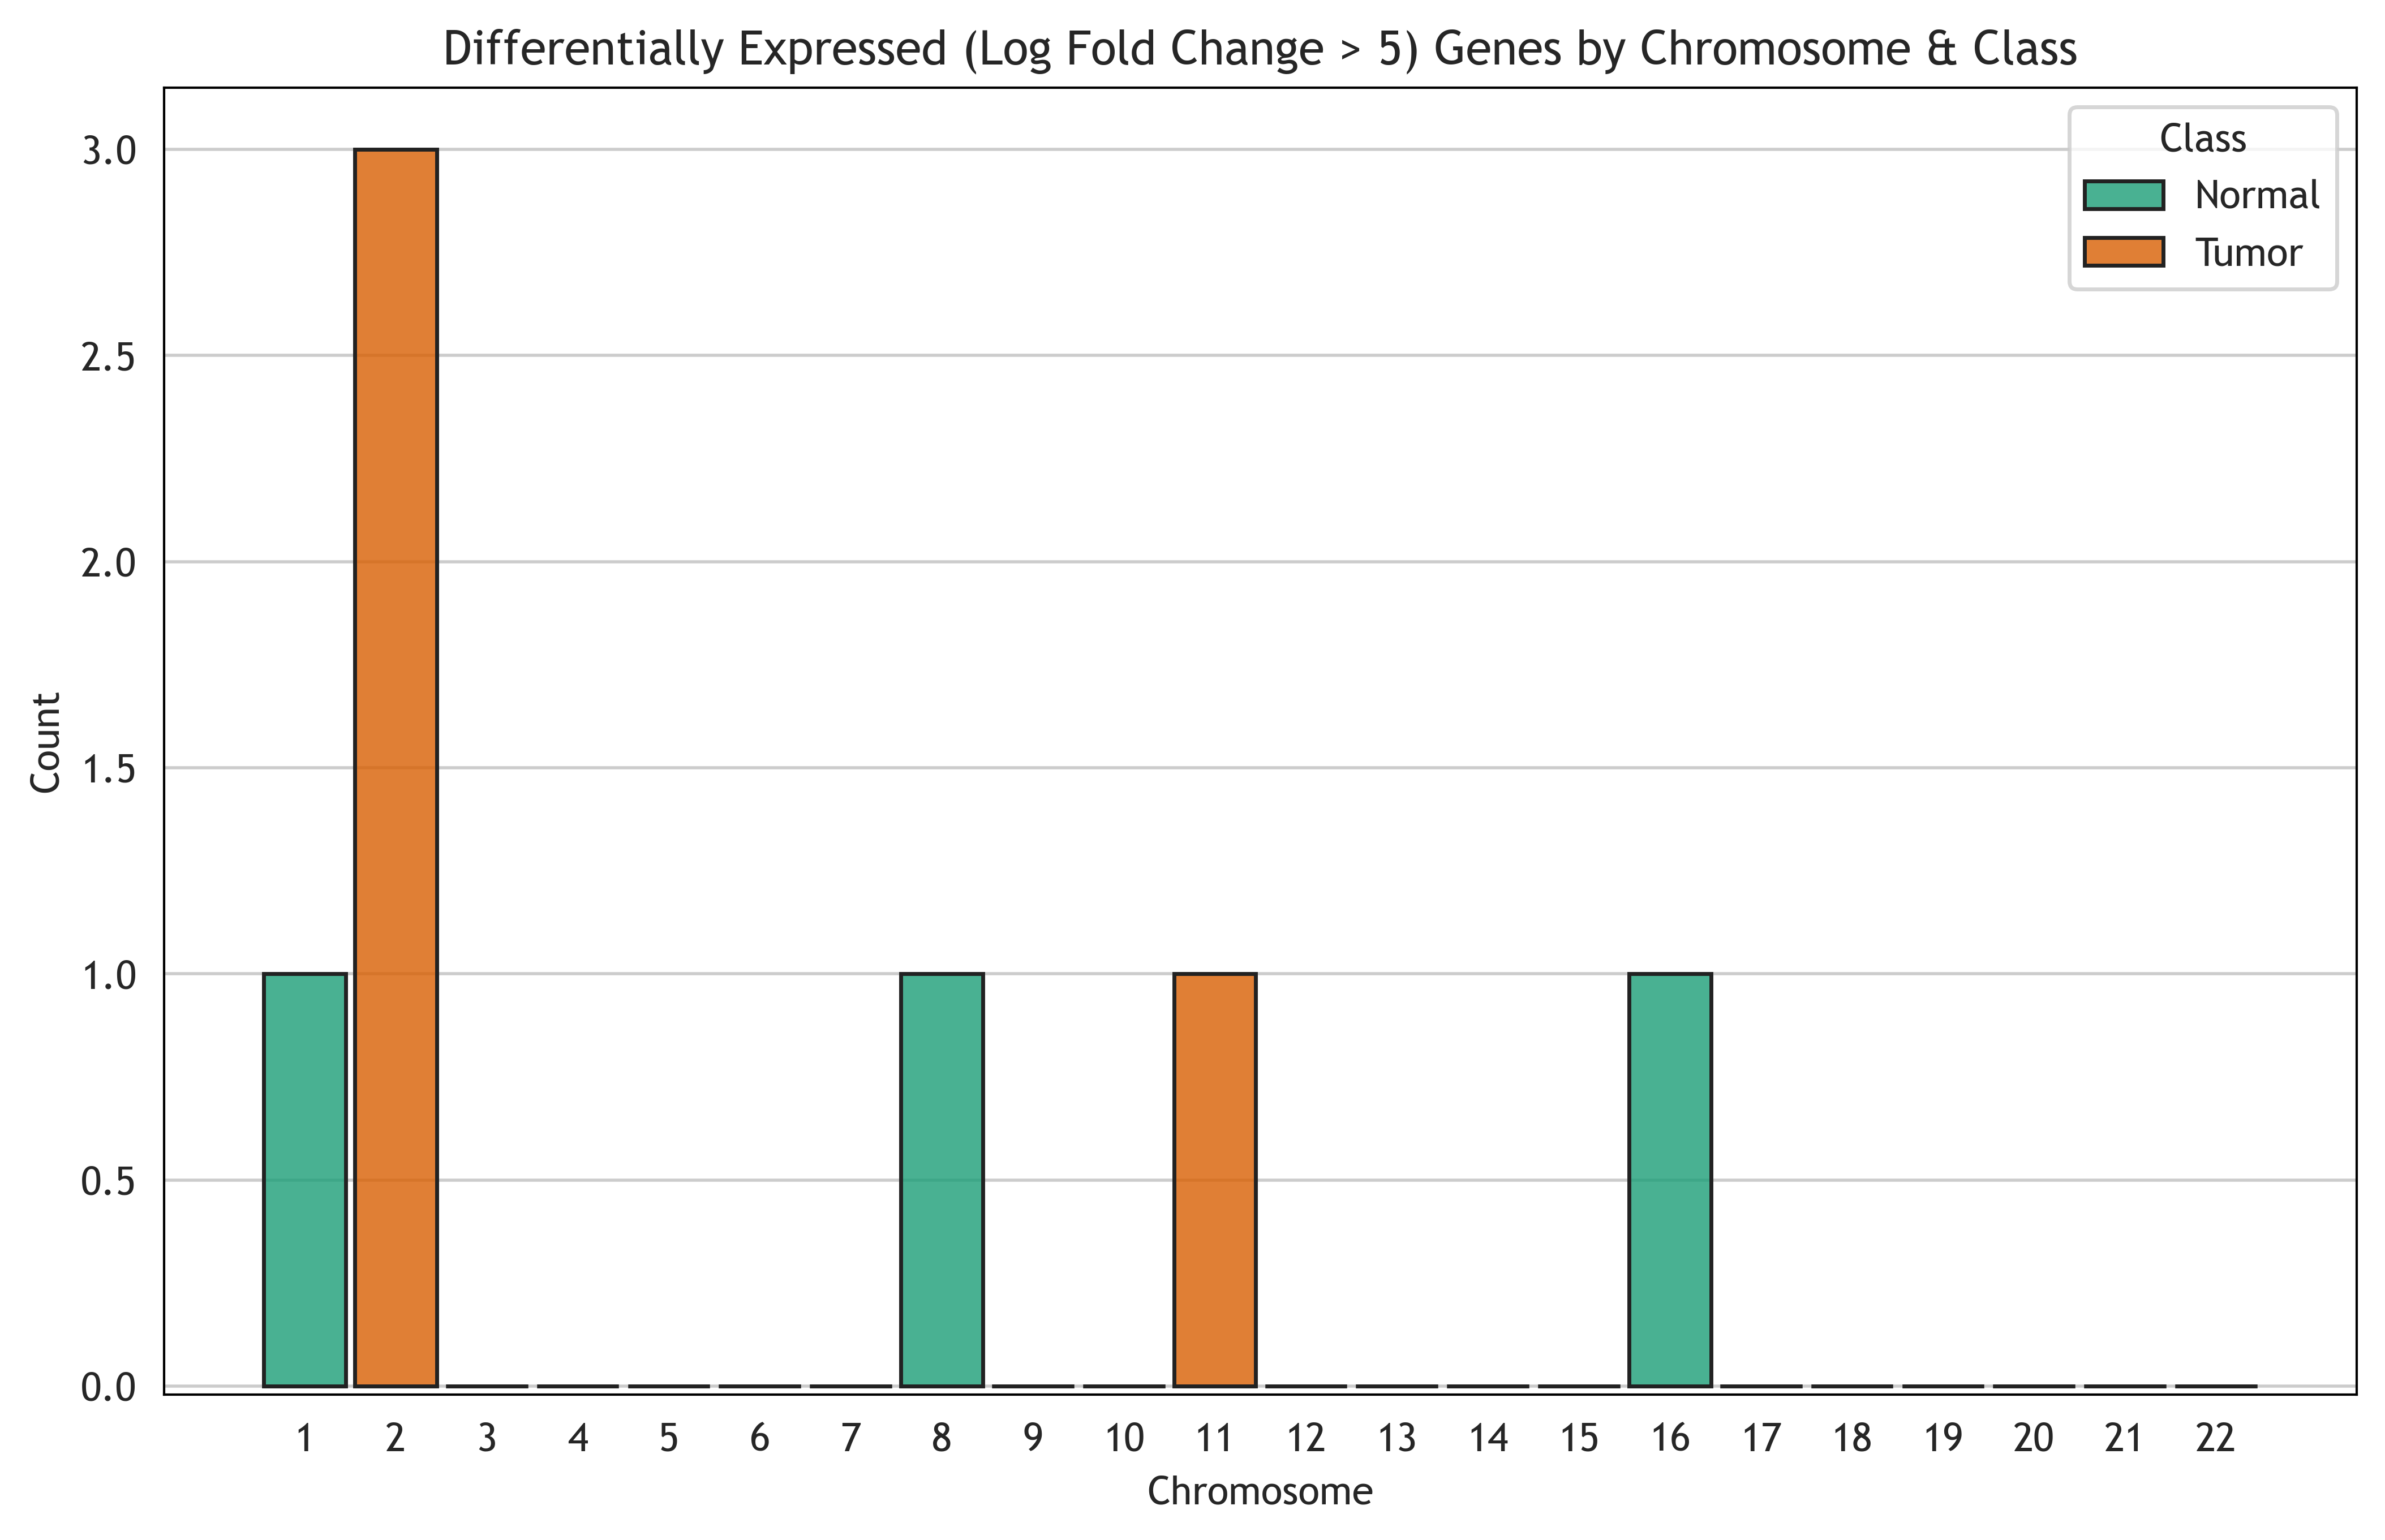

In [128]:
# Goal:
# Create a Histogram of Differentially Expressed Genes but this time with a 

# Reuse the DF from the Previous Histogram

# Open the Matplotlib figure and axes
fig, histogram_plot = plt.subplots(figsize=(10, 6), dpi=500)

# Add a plot title
histogram_plot.set_title('Differentially Expressed (Log Fold Change > 5) Genes by Chromosome & Class')

# Use Seaborn to generate a histogram of Differentially Expressed Genes
sns.histplot(
    # Select the Data for the Subplot
    data = hist_deg_df,
    # Label for the Bins
    x = "Chromosome",
    # Distinguish by Class (Normal or Tumor)
    hue= 'Class',
    # Each Chromosome is a Discrete Variable
    discrete=True,
    # Bin Range is the number of chromosomes
    binrange=(1,count_chromosomes),
    # Define the Specific Subplot to Generate this Hist plot On
    ax = histogram_plot,
    # Set borders around the Bars
    edgecolor = '#222',
    # Set the colormap for the Histogram
    palette='Dark2',
    # Set a gap between Bars
    shrink=0.9,
    # Set the Opacity of the Bars
    alpha=0.8
)

# Apply the universal style setting
jay_plt_ax_style_applicator(histogram_plot, font_family='Trebuchet MS', enable_minor_gridlines=False, enable_minor_ticks=False, enable_horizontal_gridlines=False,enable_vertical_gridlines=False)

# Set x-axis tick such that each chromosome has a tick mark
histogram_plot.set_xticks(range(1,count_chromosomes+1))

# Set the Y limit a bit below zero such that a sliver of each bar is still shown for unrepresented chromosomes
histogram_plot.set_ylim(bottom=-0.02)  # Adjust as necessary to show the sliver

# Remove the Vertical Gridlines
histogram_plot.grid(axis='x')

# Show the Plot
plt.show()
# Close the Plot to Prevent any Inconsistencies
plt.close()

d. Create a bar chart showing the percentages of the DEGs that are upregulated (higher) in Tumor samples and down regulated (lower) in Tumor samples

In [ ]:
# Assuming hist_deg_df contains the necessary data, including a column to identify up/down regulation in Tumor samples

# Calculate the percentages of upregulated and downregulated genes
# upregulated_count = plot_df[plot_df['Fold_Change'] > 0].shape[0]
# downregulated_count = plot_df[plot_df['Fold_Change'] < 0].shape[0]
# total_genes = plot_df.shape[0]
# 
# percent_upregulated = (upregulated_count / total_genes) * 100
# percent_downregulated = (downregulated_count / total_genes) * 100
# 
# # Data for plotting
# percentages = [percent_upregulated, percent_downregulated]
# categories = ['Upregulated', 'Downregulated']

In [131]:
bar_class_df

,Probe,Gene,Chromosome,Cytoband,logFC,Class,Tumor,Normal
0,ILMN_1652431,CA1,8,8q21.2b,-5.842550,Normal,9.089787,14.932337
1,ILMN_1681462,REG1B,2,2p12e,5.478012,Tumor,13.146113,7.668102
2,ILMN_1713462,AQP8,16,16p12.1b,-5.867768,Normal,8.363128,14.230897
3,ILMN_1763749,GUCA2A,1,1p34.2b,-5.045741,Normal,9.617061,14.662802
4,ILMN_1802441,REG1A,2,2p12e,5.466475,Tumor,13.200322,7.733847
5,ILMN_2192072,MMP7,11,11q22.2a,5.265229,Tumor,13.281959,8.016730
6,ILMN_2382679,REG3A,2,2p12e,5.246175,Tumor,13.026109,7.779934


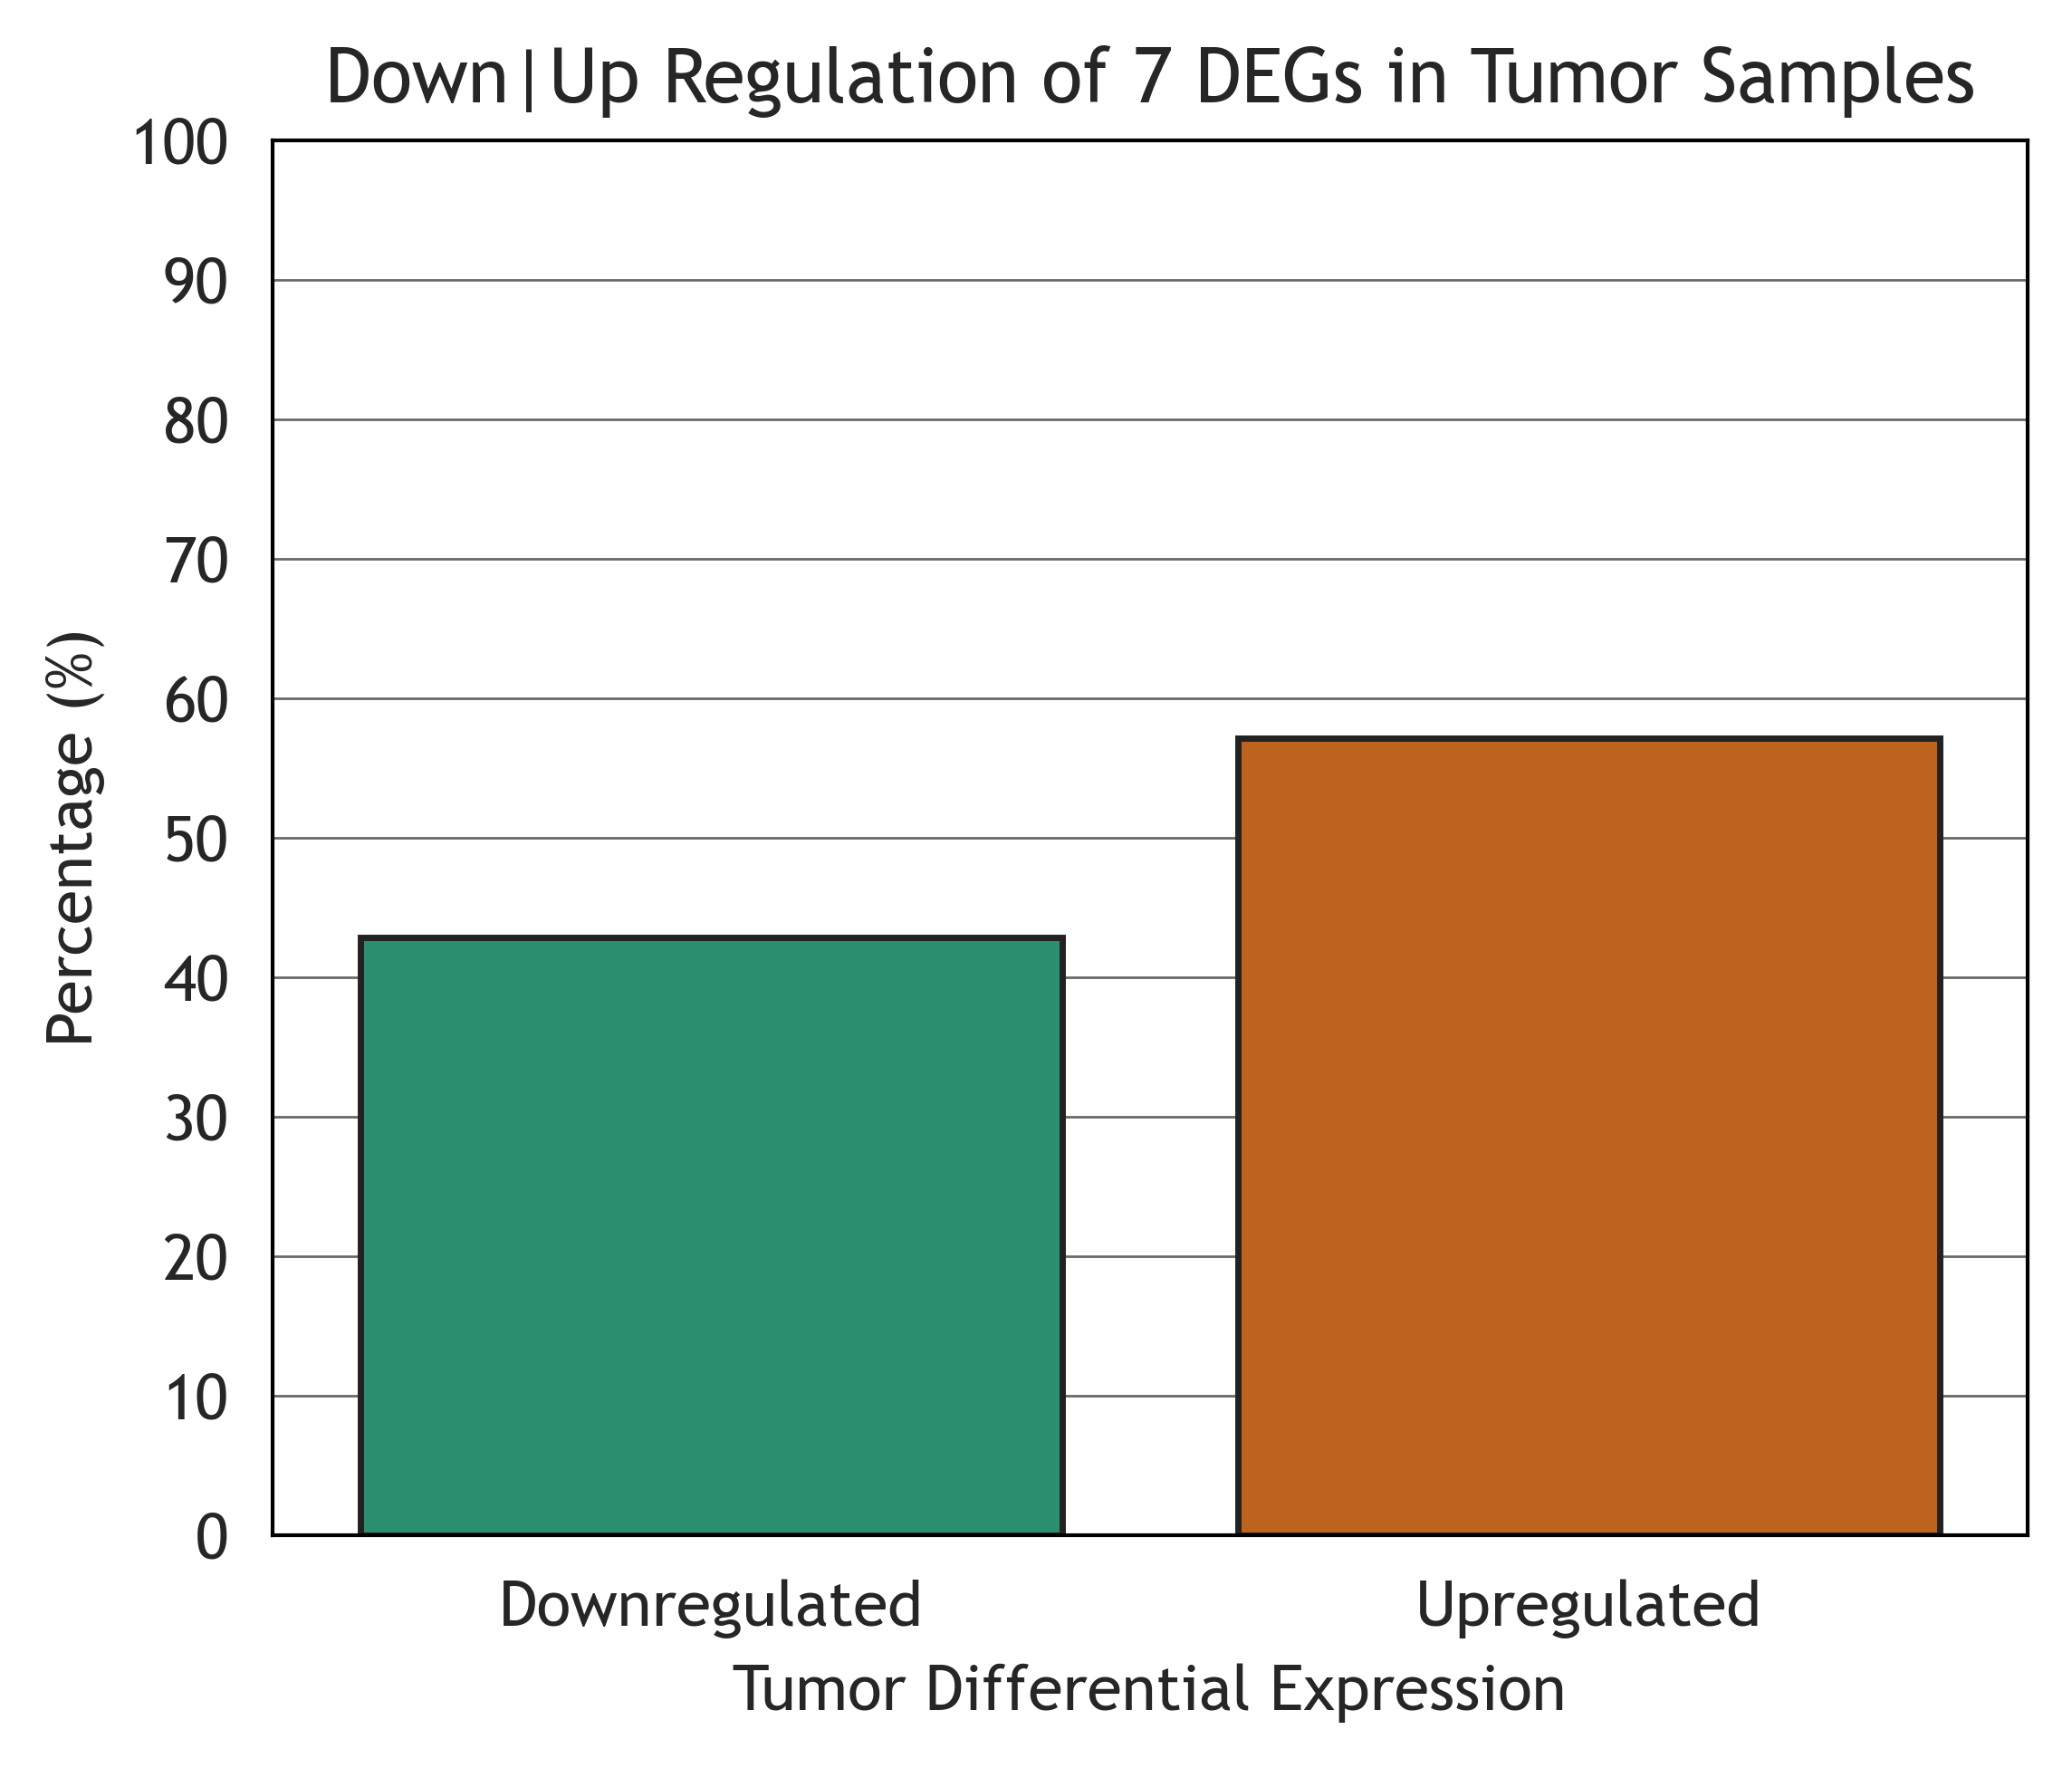

In [164]:
# Copy the Data from the Main Plot DF
bar_class_df = plot_df.copy()

# Map the 'Class' column to 'Upregulated' and 'Downregulated' based on the bar plot requirements
bar_class_df['Tumor Differential Expression'] = bar_class_df['Class'].map({'Normal': 'Downregulated','Tumor': 'Upregulated', })

# Open the Matplotlib figure and axes
fig, bar_plot = plt.subplots(figsize=(5, 4), dpi=500)

# Add a plot title
bar_plot.set_title(f"Down|Up Regulation of {bar_class_df['Gene'].nunique()} DEGs in Tumor Samples")

# Calculate the percentage of each class
class_percents = bar_class_df['Tumor Differential Expression'].value_counts(normalize=True) * 100

# Rebind the Bar plot by Class DF using the class percents series
bar_class_df = class_percents.reset_index()
bar_class_df.columns = ['Tumor Differential Expression', 'Percentage']

# Sort the dataframe in reverse order to change the plotting order
bar_class_df = bar_class_df.sort_values(by='Tumor Differential Expression', ascending=True)

# Use Seaborn to generate a bar chart
sns.barplot(
    # Set the Data source for the Bar plot
    data=bar_class_df,
    # Name of the Categories along the X-Axis
    x='Tumor Differential Expression',
    # Distinguish Colors of the Bars by the Up-Regulated/Down-Regulated Column
    hue='Tumor Differential Expression',
    # Use the numeric percentage
    y='Percentage',
    # Define the Specific Subplot to Generate this Bar plot On
    ax = bar_plot,
    # Set borders around the Bars
    edgecolor = '#222',
    # Set the colormap for the Histogram
    palette='Dark2',
)

# Apply the universal style setting
jay_plt_ax_style_applicator(bar_plot, font_family='Trebuchet MS', enable_minor_gridlines=False, enable_minor_ticks=True, enable_horizontal_gridlines=True, enable_vertical_gridlines=False)

# Set y-axis label
bar_plot.set_ylabel('Percentage (%)')

# Explicitly set the y-axis to go from 0 to 100 and draw ticks at every 25%
bar_plot.set_ylim(0, 100)
bar_plot.set_yticks(range(0,101,10))

# Show the Plot
plt.show()

# Close the Plot to Prevent any Inconsistencies
plt.close()


e. Use the raw data from part 1b to create a heatmap visualizing gene expression by sample

In [168]:
# Data from 1b is called: gene_exp_df 
gene_exp_df

#print(gene_exp_df.head())

,Probe_ID,Sample_Name,Gene_Expression,Group,Patient_Number
0,ILMN_1343291,GSM820516,66665.3800,tumor,1
1,ILMN_1343295,GSM820516,22040.1100,tumor,1
2,ILMN_1651199,GSM820516,226.6081,tumor,1
3,ILMN_1651209,GSM820516,278.5710,tumor,1
4,ILMN_1651210,GSM820516,195.4914,tumor,1
...,...,...,...,...,...
878449,ILMN_2415911,GSM820533,686.2645,normal,9
878450,ILMN_2415926,GSM820533,2486.7550,normal,9
878451,ILMN_2415949,GSM820533,2230.4140,normal,9
878452,ILMN_2415979,GSM820533,4462.6400,normal,9


In [188]:
# Copy the DF in preparation for the Heatmap
probeID_x_Sample_long_df = gene_exp_df.copy()
# Map 'Tumor' to 'T' and 'normal' to 'F'
class_map = {'tumor': 'T', 'normal': 'F'}
probeID_x_Sample_long_df['Group'] = probeID_x_Sample_long_df['Group'].map(class_map)
# Concatenate the Group and Patient Number for the Sample ID
probeID_x_Sample_long_df['Sample_ID'] = probeID_x_Sample_long_df['Group'] +'-'+ probeID_x_Sample_long_df['Patient_Number'].astype(str)
# Drop the Original Columns
probeID_x_Sample_long_df.drop(columns=['Group','Patient_Number','Sample_Name'],inplace=True)
# Reset the Index
probeID_x_Sample_long_df.reset_index(drop=True,inplace=True)

In [189]:
# Validate the DF
probeID_x_Sample_long_df

,Probe_ID,Gene_Expression,Sample_ID
0,ILMN_1343291,66665.3800,T-1
1,ILMN_1343295,22040.1100,T-1
2,ILMN_1651199,226.6081,T-1
3,ILMN_1651209,278.5710,T-1
4,ILMN_1651210,195.4914,T-1
...,...,...,...
878449,ILMN_2415911,686.2645,F-9
878450,ILMN_2415926,2486.7550,F-9
878451,ILMN_2415949,2230.4140,F-9
878452,ILMN_2415979,4462.6400,F-9


In [190]:
# Convert the Long Dataframe back into a Wide Dataframe for Matrix Purposes
probeID_x_Sample_df = probeID_x_Sample_long_df.pivot_table(
    index='Probe_ID',  # Rows will be Samples
    columns='Sample_ID',  # Columns will be Probes
    values='Gene_Expression'  # Cell values will be gene expressions
)

#print(probeID_x_Sample_df.dtypes)

In [191]:
# Validate the DF for the Heatmap
probeID_x_Sample_df

Sample_ID,F-1,F-2,F-3,F-4,F-5,F-6,F-7,F-8,F-9,T-1,T-2,T-3,T-4,T-5,T-6,T-7,T-8,T-9
Probe_ID,,,,,,,,,,,,,,,,,,
ILMN_1343291,69404.6700,68943.9700,71775.3000,69713.7000,68244.5900,68436.5200,69959.7700,70063.7700,70332.3400,66665.3800,64128.0700,67827.2200,62245.5900,69509.2700,65427.4700,57608.6700,69509.2700,69647.1700
ILMN_1343295,13046.3400,16641.8900,18933.2900,9906.9130,12428.9500,17535.6000,17854.2900,22849.0800,28747.0100,22040.1100,38678.9600,33719.8900,26170.0400,17166.5200,25297.5700,19749.1400,43670.6800,23725.6600
ILMN_1651199,205.4483,229.0451,203.8710,210.4129,212.7384,232.2437,229.2948,216.6758,252.1502,226.6081,217.2475,226.3029,213.4431,229.5394,226.1345,208.7316,214.4033,195.6539
ILMN_1651209,253.7044,278.0423,265.1900,273.4458,310.1582,274.9519,255.8540,292.4965,237.9844,278.5710,211.8002,259.8059,321.2587,253.6032,275.0126,250.6420,219.5752,253.3126
ILMN_1651210,195.9835,193.9065,164.0632,190.9813,199.3084,213.3975,173.7073,174.6898,191.9382,195.4914,175.3356,229.5674,244.6696,188.1039,220.6229,194.7746,185.3380,195.3534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ILMN_2415911,1084.3610,692.3060,947.1885,587.1460,852.5927,716.9376,835.5988,731.5306,686.2645,965.4537,975.9432,1306.9460,837.6633,833.9681,1234.8830,1254.8400,1034.8450,1104.9090
ILMN_2415926,1152.4940,913.1962,1336.6350,902.1262,1317.9910,1741.8400,1048.7180,1294.8670,2486.7550,3583.4440,2049.1500,1996.2160,1693.9640,2569.1790,3384.6820,1978.3250,2644.4420,1705.6710
ILMN_2415949,822.8831,1630.6520,2222.9580,1810.6850,977.6974,1922.0240,1626.1940,1918.5350,2230.4140,2282.5570,2359.0100,2951.5930,2120.2090,1535.9080,1849.7140,2400.9900,2502.9950,1135.9280


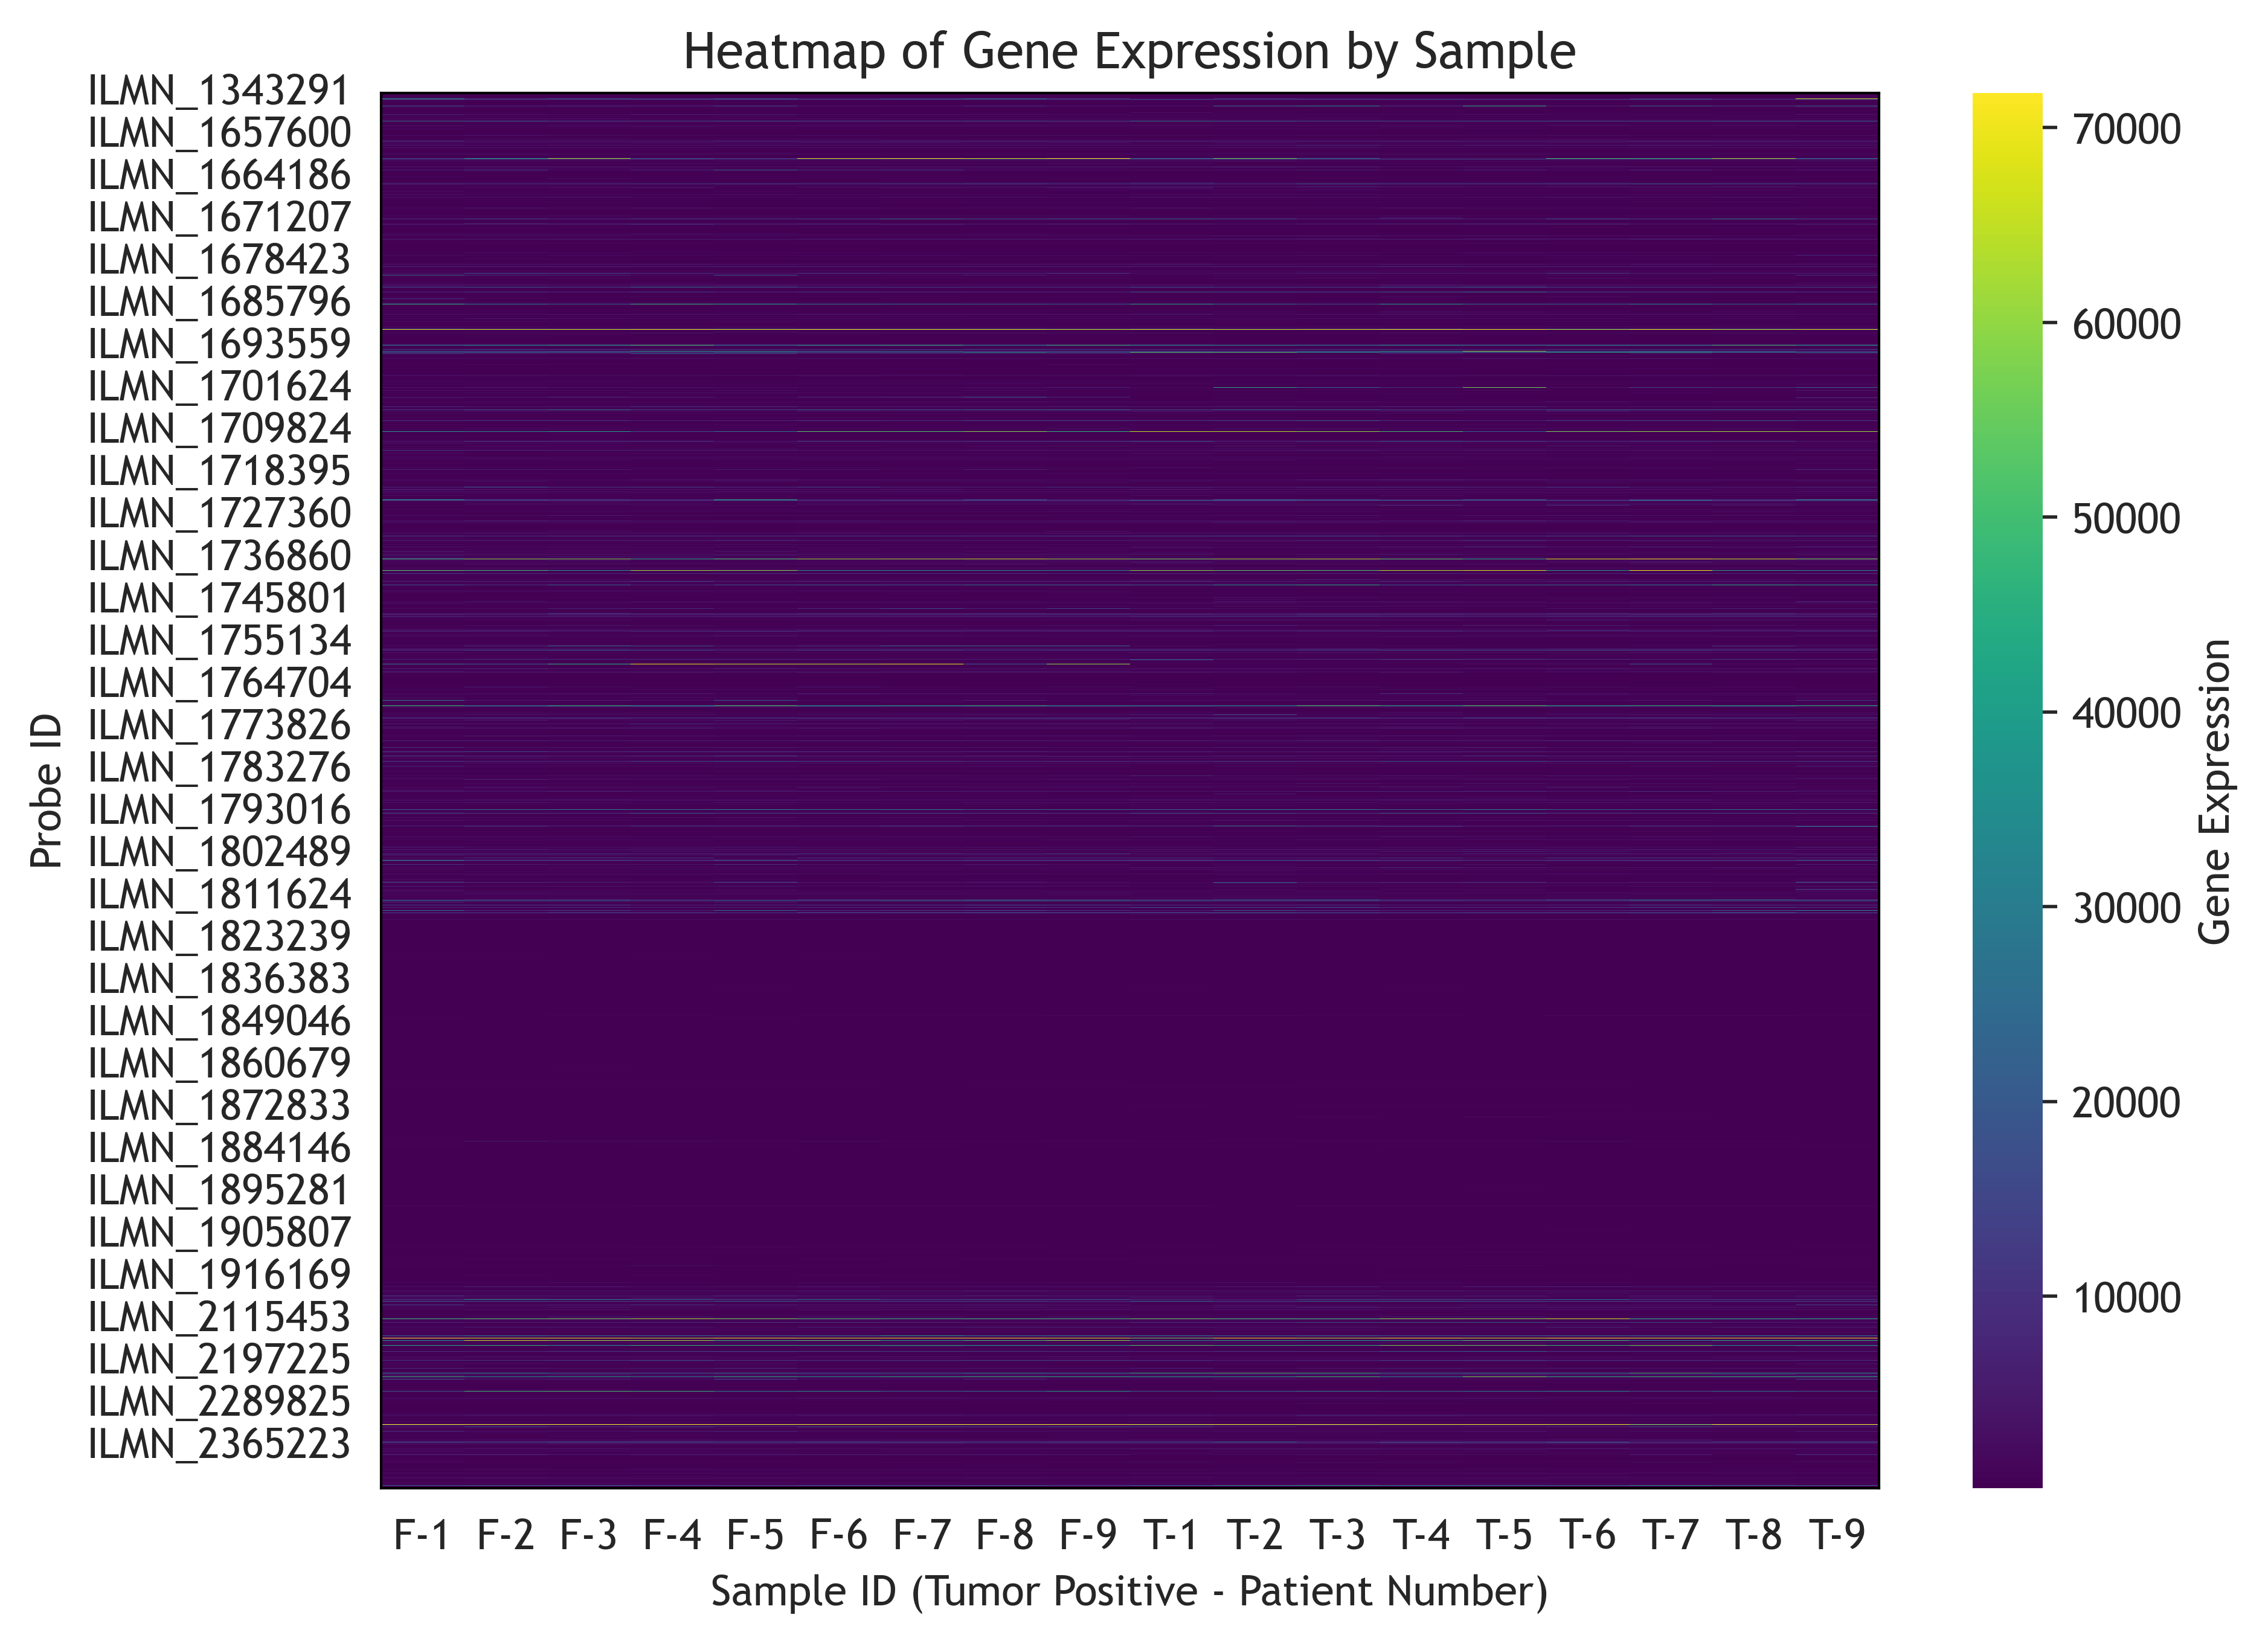

In [200]:
# Plotting the heatmap
# Set the Size of the Figure and the Subplot
fig, sample_heatmap = plt.subplots(figsize=(8, 6),dpi=500)

# Set the Title of the Heatmap
plt.title('Heatmap of Gene Expression by Sample')

# Plot the Seaborn Heatmap
sns.heatmap(
    # Set the Plot for the Heatmap to be rendered on
    ax=sample_heatmap,
    # Matrix of Data for the Heatmap
    data=probeID_x_Sample_df, 
    # Set Colormap for the Heatmap
    cmap="viridis", 
    # Show the Legend representing the Intensity,
    cbar=True,
    # Set Label for the Heatmap
    cbar_kws={'label': 'Gene Expression'})

# Set the Universal Style of the Heatmap
sample_heatmap = jay_plt_ax_style_applicator(sample_heatmap)

# Set the X and Y axis Labels
plt.xlabel('Sample ID (Tumor Positive - Patient Number)')
plt.ylabel('Probe ID')

# Show the Plot
plt.show()

# Close the Plot to Prevent any Inconsistencies
plt.close()


3f. Use the same data from the previous part to create a clustermap visualizing gene expression by sample

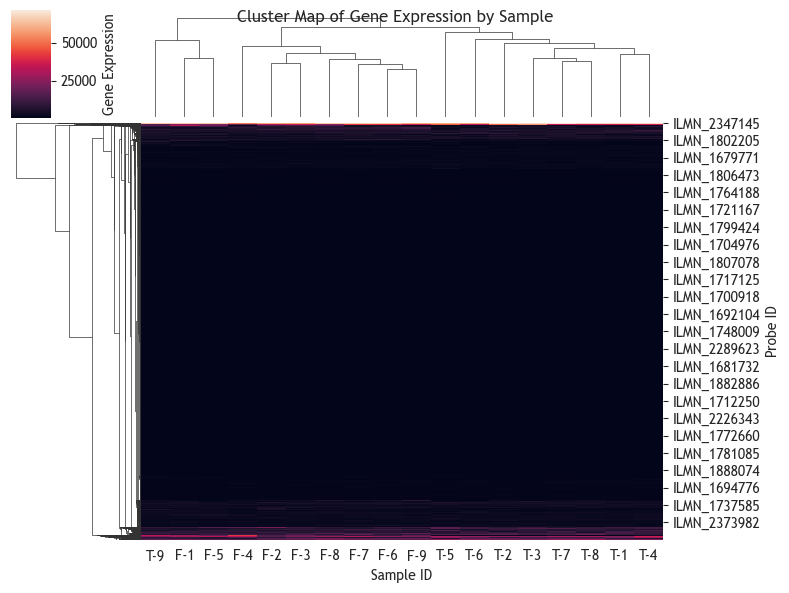

In [205]:
# Plot the Seaborn Cluster Map
cluster_map = sns.clustermap(
    data=probeID_x_Sample_df,
    cmap="rocket",  # Set Colormap for the Cluster Map
    cbar_kws={'label': 'Gene Expression'},  # Show the Legend representing the Intensity
    figsize=(8, 6)  # Set the Size of the Cluster Map
)

# Set the Title of the Cluster Map
cluster_map.fig.suptitle('Cluster Map of Gene Expression by Sample')

# Set the X and Y axis Labels
cluster_map.ax_heatmap.set_xlabel('Sample ID')
cluster_map.ax_heatmap.set_ylabel('Probe ID')

# Show the Plot
plt.show()

# Close the Plot to Prevent any Inconsistencies
plt.close()

g. Write a few sentence explaining the findings of your analysis, feel free to reference any of visualizations

The log2 fold change formula for analyzing gene expression data was used instead of the conventional fold change method. The log formula equally emphasizes both upregulation and downregulation, thereby overcoming the traditional method's limitation in accurately representing downregulated genes, as seen in the traditional formula's inability to catch any downregulated genes. The log2 transformation allows for a symmetrical comparison which ultimately yielded more valuable insights.

The cytogenetic analysis, as seen in the Differential Gene Expressions by Cytoband plot, revealed insights into gene regulation on Chromosome 2, specifically within cytoband 2p12e. On cytoband 2p12e, three genes— REG1A, REG1B, and REG3A— were significantly upregulated in tumor samples which indicates elevated oncogenic activity or a critical interaction network in tumor pathology interaction networks. MMP7 of Cytoband 11q22.2a on Chromosome 11 is another gene exhibiting upregulation. A quick search for the gene reinforces the observation as it has been previously established in cancer-related processes such as tissue remodeling and invasion.

Oppositely three genes— GUCA2A of Cytoband 1p34.2b, AQP8 of 16p12.1b, and CA1 of 8q21.2b— displayed downregulation in tumor samples versus the control group, suggesting a possible functional repression or alteration in the tumor class. These changes in gene expression levels necessitate further investigation through functional annotation and pathway analysis to elucidate their roles in cancer biology. Nevertheless both upregulated and downregulated genes are equally insightful in molecular cancer biology research.

h. BONUS: Additional embellishments to your visualizations, using matplotlib and/or seaborn functions to make your visualizations more aesthetically pleasing will be rewarded up to 20 extra points

In [41]:
# Added Relevant, Labels, Legends, and Axes while also specifying my style in terms of applying plot borders and color maps and such

## 3. Documentation
Write a ReadMe file meeting all the requirements described in the first assignment is a prerequisite.
